## **SISTEM DETEKSI PENIPUAN TRANSAKSI E-COMMERCE MENGGUNAKAN ALGORITMA GRADIENT BOOSTING**




 | Nama | NRP |
 | ---- | ---- |
 | Nathaniel Ryo Kurniadi | 5025221019 |

---

**Dr. Sarwosri, S.Kom, M.T.**


---

</br>

**Dataset**: <br>
https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions/data
<br>

**Model Building**: <br>
Gradient Boosting Machines (GBM), Extreme Gradient Boosting (XGboost), Categorical Boosting (CatBoost)

# **CRISP-DM**

Metodologi pengembangan model Menggunakan Cross Industry Standard Processf for Data Mining

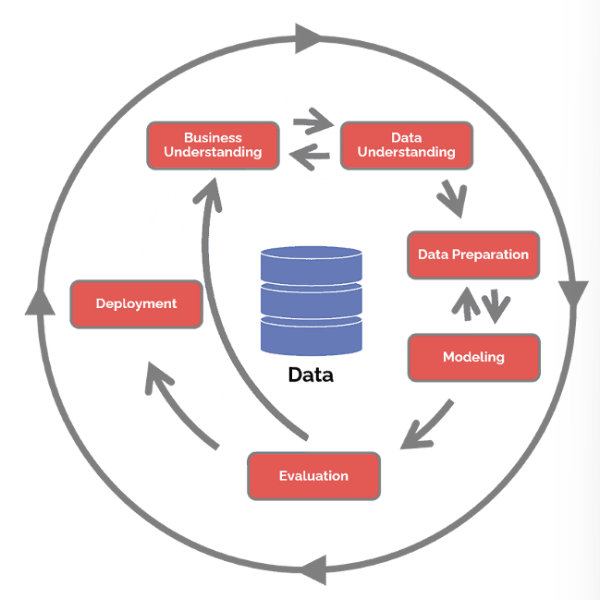

# **Import Library & Dataset**

In [1]:
# %pip install tensorflow
# %pip install kaggle
# %pip install networkx
# %pip install lightgbm 
# %pip install catboost 
# %pip install torch 
# %pip install torch-geometric

In [2]:
import os
import json
import pickle
from datetime import datetime

# cred = {"username":"nathanielryo","key":"a6af88b906ee9e800165dbaef8ed8bbd"}
# os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# api_token = cred


# with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
#     json.dump(api_token, f)

In [3]:
# ! kaggle datasets download -d shriyashjagtap/fraudulent-e-commerce-transactions

In [4]:
# import zipfile

# with zipfile.ZipFile("fraudulent-e-commerce-transactions.zip", "r") as zip_ref:
#     zip_ref.extractall("fraud_dataset")

In [5]:
# =========================
# Basic Libraries
# =========================
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from sklearn.decomposition import PCA
from scipy import stats

# =========================
# Visualization
# =========================
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Preprocessing
# =========================
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,LabelEncoder,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split

# =========================
# Model Selection & Evaluation
# =========================
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    average_precision_score,
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# =========================
# Machine Learning Models
# =========================
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# =========================
# Deep Learning (PyTorch & PyG)
# =========================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, SAGEConv, global_mean_pool
from torch_geometric.loader import NeighborLoader


# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform



# **Business Understanding**

Perkembangan e-commerce di Indonesia menunjukan pertumbuhan pesat, pendapatan e-commerce diperkirakan mencapai **US$41,97 miliar pada 2025** dan meningkat hingga **US$60,95 miliar pada 2030** (CAGR 7,75%), dengan jumlah pengguna yang diproyeksikan mencapai **125,9 juta pada 2030** ([Statista, 2025](https://www.statista.com/outlook/emo/ecommerce/worldwide)).
<br /> <br />

**Tujuan** <br />
Proyek ini bertujuan untuk membangun mode machine learning berbasis **Gradient Boosting** yang dapat:
1. Mengklasifikasikan apakah suatu transaksi e-commerce termasuk fraud atau tidak.
2. Memberikan model sebagai pendukung keputusan yang dapat diintegrasikan pada proses validasi transaksi di sistem e-commerce.


# **Data Understanding**

## **Data Collection**

- Dataset diambil dari Kaggle: [Fraudulent E-Commerce Transactions](https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions/data)
- Data berisi transaksi pembelian customer e-commerce

## **Data Description**

Adapun fitur-fitur pada dataset kali ini adalah sebagai berikut:


| Kolom                  | Deskripsi                                                                                   |
| ---------------------- | ------------------------------------------------------------------------------------------- |
| **Transaction ID**     | ID unik untuk setiap transaksi.                                                             |
| **Customer ID**        | ID unik pelanggan yang melakukan transaksi.                                                 |
| **Transaction Amount** | Jumlah nominal uang dalam transaksi dalam USD ($).             |
| **Transaction Date**   | Tanggal transaksi dilakukan.                                                                |
| **Payment Method**     | Metode pembayaran yang digunakan (misalnya: kartu kredit, transfer bank,PayPal, dll).    |
| **Product Category**   | Kategori produk yang dibeli dalam transaksi (misalnya: elektronik, pakaian, dll).           |
| **Quantity**           | Jumlah unit produk yang dibeli dalam transaksi.                                             |
| **Customer Age**       | Usia pelanggan saat melakukan transaksi.                                                    |
| **Customer Location**  | Lokasi atau wilayah pelanggan.                                                              |
| **Device Used**        | Jenis perangkat yang digunakan pelanggan untuk melakukan transaksi (misalnya: mobile, dekstop,dll). |
| **IP Address**         | Alamat IP yang digunakan pelanggan saat transaksi.                                          |
| **Shipping Address**   | Alamat tujuan pengiriman produk.                                                            |
| **Billing Address**    | Alamat penagihan pelanggan                            |
| **Is Fraudulent**      | Label target: 1 = transaksi fraud, 0 = transaksi normal.                                    |
| **Account Age Days**   | Lama umur akun pelanggan dalam hitungan hari sejak dibuat.                                  |
| **Transaction Hour**   | Jam (0–23) ketika transaksi dilakukan.                                                      |                                                         |

<br>

## **Exploratory Data Analysis**

Untuk EDA dan proses training, kita akan menggunakan dataset dari csv `Fraudulent_E-Commerce_Transaction_Data` yang mempunyai lebih dari 1 juta entri

### **Intro EDA**

Pertama, kita akan memuat dataset dan menampilkannya untuk memastikan bahwa dataset berhasil dimuat dengan benar.

In [6]:
df = pd.read_csv("./fraud_dataset/Fraudulent_E-Commerce_Transaction_Data.csv")

In [7]:
df.head().T

,0,1,2,3,4
Transaction ID,15d2e414-8735-46fc-9e02-80b472b2580f,0bfee1a0-6d5e-40da-a446-d04e73b1b177,e588eef4-b754-468e-9d90-d0e0abfc1af0,4de46e52-60c3-49d9-be39-636681009789,074a76de-fe2d-443e-a00c-f044cdb68e21
Customer ID,d1b87f62-51b2-493b-ad6a-77e0fe13e785,37de64d5-e901-4a56-9ea0-af0c24c069cf,1bac88d6-4b22-409a-a06b-425119c57225,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,45071bc5-9588-43ea-8093-023caec8ea1c
Transaction Amount,58.09,389.96,134.19,226.17,121.53
Transaction Date,2024-02-20 05:58:41,2024-02-25 08:09:45,2024-03-18 03:42:55,2024-03-16 20:41:31,2024-01-15 05:08:17
Payment Method,bank transfer,debit card,PayPal,bank transfer,bank transfer
Product Category,electronics,electronics,home & garden,clothing,clothing
Quantity,1,2,2,5,2
Customer Age,17,40,22,31,51
Customer Location,Amandaborough,East Timothy,Davismouth,Lynnberg,South Nicole
Device Used,tablet,desktop,tablet,desktop,tablet


In [42]:
df.tail()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
1472947,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,2024-01-12 23:39:55,PayPal,health & beauty,2,29,North Laurafort,desktop,27.245.104.92,USNV Griffin\nFPO AA 52700,USNV Griffin\nFPO AA 52700,0,149,23
1472948,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,2024-03-27 04:31:45,credit card,clothing,2,32,Burnsville,tablet,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, GA 68797","478 John Square Apt. 235\nMillerhaven, GA 68797",0,132,4
1472949,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,2024-01-31 23:51:42,bank transfer,electronics,4,36,Garciafort,mobile,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, OH ...","182 House Island Suite 198\nEast Scott, FM 84301",0,98,23
1472950,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,2024-01-12 16:21:32,bank transfer,electronics,5,34,Lake Josephberg,desktop,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...","27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...",0,191,16
1472951,d1a811a2-6015-47fa-95e5-0a5282755932,637d5ed1-a4af-4234-a1d9-a3791b6f1bb6,376.44,2024-02-19 18:57:20,bank transfer,clothing,5,34,Fullermouth,desktop,107.116.208.218,Unit 0520 Box 5911\nDPO AE 75554,Unit 0520 Box 5911\nDPO AE 75554,0,274,18


In [43]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [44]:
df.size

23567232

In [45]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

Karena tidak ada data yang kosong, maka tidak perlu ada kolom yang dihapus karena data kosong

In [46]:
num_cols = ["Transaction Amount", "Quantity", "Customer Age", "Account Age Days", "Transaction Hour"]

summary = pd.DataFrame({
    "Mean": df[num_cols].mean().round(2),
    "Median": df[num_cols].median().round(2),
    "Mode": df[num_cols].mode().iloc[0],
    "Std Dev": df[num_cols].std().round(2),
    "Min": df[num_cols].min(),
    "Max": df[num_cols].max()
})

print(summary)


                      Mean  Median  Mode  Std Dev   Min       Max
Transaction Amount  226.77  151.76  12.0   270.40  10.0  12701.75
Quantity              3.00    3.00   5.0     1.41   1.0      5.00
Customer Age         34.51   35.00  35.0    10.00 -16.0     86.00
Account Age Days    179.65  179.00  11.0   106.86   1.0    365.00
Transaction Hour     11.29   11.00   3.0     6.98   0.0     23.00


Customer dengan age negatif, perlu di drop datanya

### **Data Visualization**

#### **Distribusi Data**

count    1.472952e+06
mean     2.267683e+02
std      2.703951e+02
min      1.000000e+01
25%      6.861000e+01
50%      1.517600e+02
75%      2.960500e+02
max      1.270175e+04
Name: Transaction Amount, dtype: float64


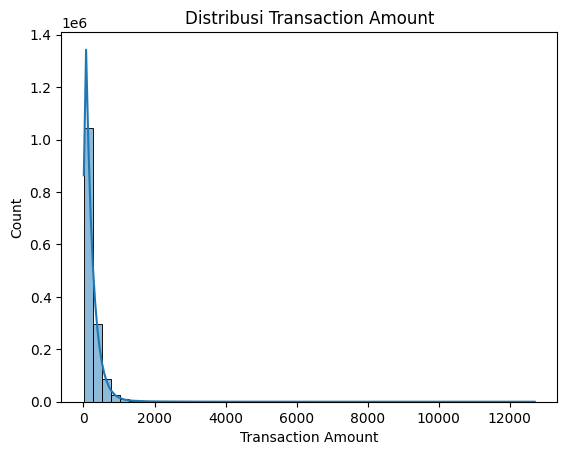

In [47]:
print(df["Transaction Amount"].describe())
sns.histplot(df["Transaction Amount"], bins=50, kde=True)
plt.title("Distribusi Transaction Amount")
plt.show()

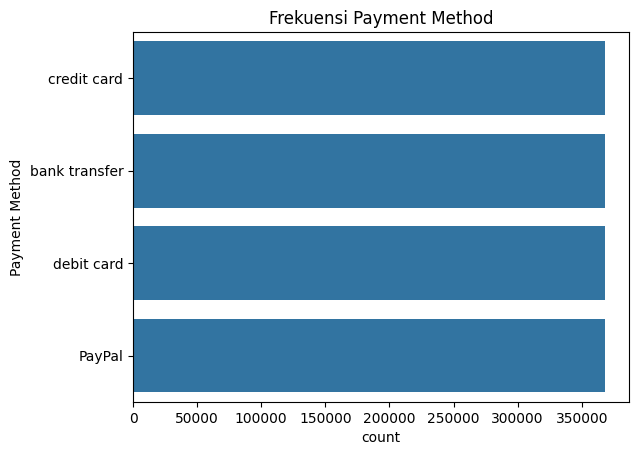

                 Count  Percentage
Payment Method                    
credit card     368429       25.01
bank transfer   368278       25.00
debit card      368277       25.00
PayPal          367968       24.98


In [48]:
sns.countplot(y="Payment Method", data=df, order=df["Payment Method"].value_counts().index)
plt.title("Frekuensi Payment Method")
plt.show()
payment_counts = df["Payment Method"].value_counts()
payment_percent = df["Payment Method"].value_counts(normalize=True) * 100
payment_summary = pd.DataFrame({
    "Count": payment_counts,
    "Percentage": payment_percent.round(2)
})
print(payment_summary)

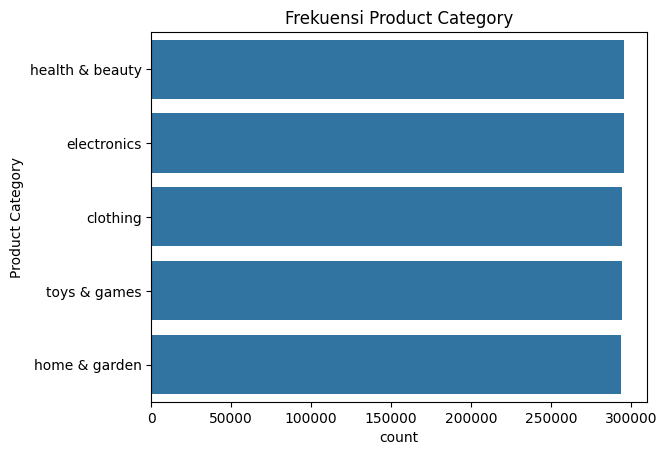

Product Category
health & beauty    295367
electronics        295294
clothing           294319
toys & games       294266
home & garden      293706
Name: count, dtype: int64


In [49]:
sns.countplot(y="Product Category", data=df, order=df["Product Category"].value_counts().index)
plt.title("Frekuensi Product Category")
plt.show()
print(df["Product Category"].value_counts())

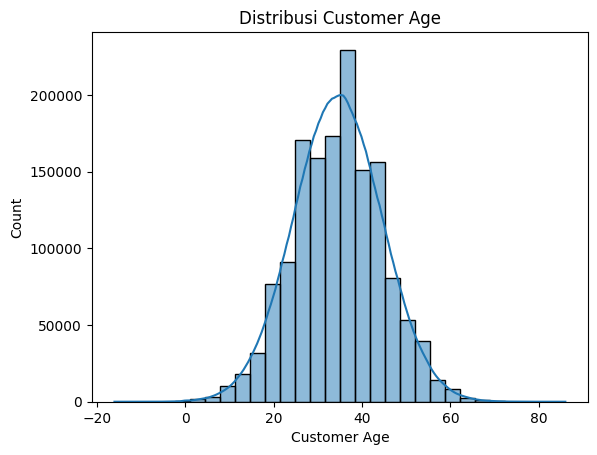

In [50]:
sns.histplot(df["Customer Age"], bins=30, kde=True)
plt.title("Distribusi Customer Age")
plt.show()

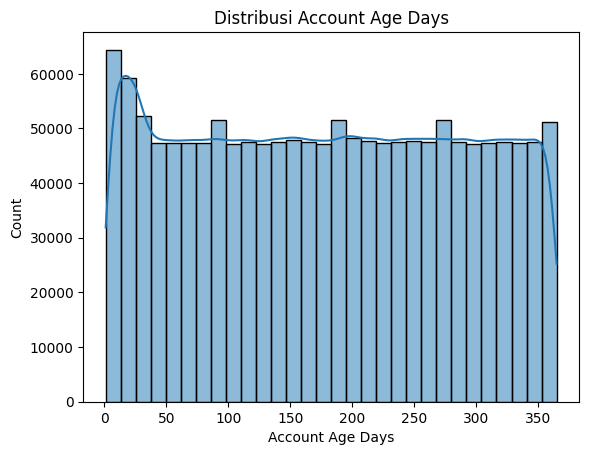

In [51]:
sns.histplot(df["Account Age Days"], bins=30, kde=True)
plt.title("Distribusi Account Age Days")
plt.show()

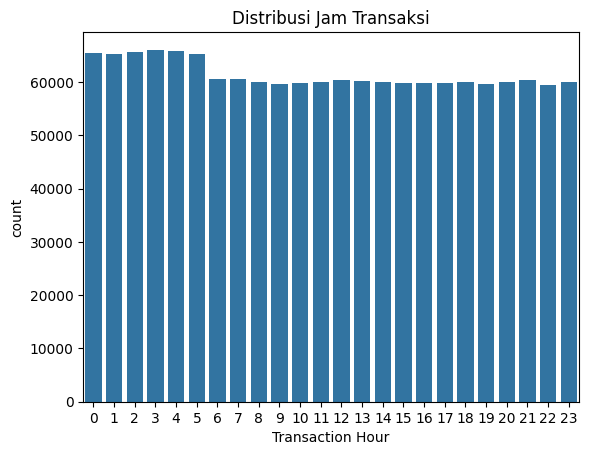

In [52]:
sns.countplot(x="Transaction Hour", data=df)
plt.title("Distribusi Jam Transaksi")
plt.show()

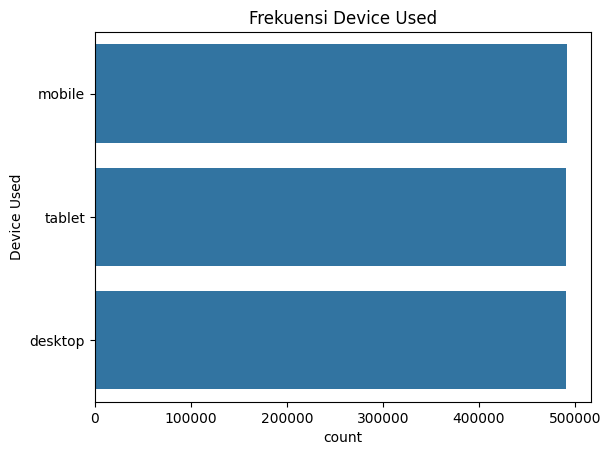

In [53]:
sns.countplot(y="Device Used", data=df, order=df["Device Used"].value_counts().index)
plt.title("Frekuensi Device Used")
plt.show()

#### **Analisis Variabel Target**

                 Count  Percentage (%)
Is Fraudulent                         
0              1399114           94.99
1                73838            5.01


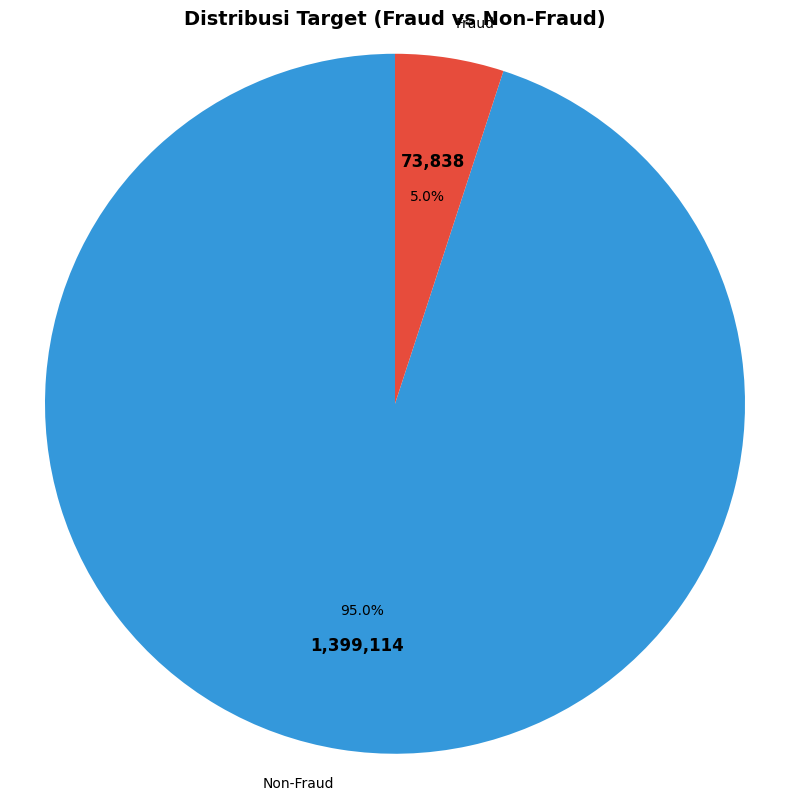

In [54]:
fraud_counts = df["Is Fraudulent"].value_counts()
fraud_percentages = df["Is Fraudulent"].value_counts(normalize=True) * 100

fraud_summary = pd.DataFrame({
    "Count": fraud_counts,
    "Percentage (%)": fraud_percentages.round(2)
})
print(fraud_summary)


plt.figure(figsize=(8, 8))

labels = ['Non-Fraud', 'Fraud']
sizes = fraud_counts.values
# Biru untuk Non-Fraud, Merah untuk Fraud
colors = ['#3498db', '#e74c3c']  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

for i, (label, size) in enumerate(zip(labels, sizes)):
    angle = 90 + 360 * sum(sizes[:i]) / sum(sizes) + 180 * size / sum(sizes)
    plt.text(0.7 * np.cos(np.radians(angle)), 0.7 * np.sin(np.radians(angle)), 
             f'{size:,}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.title("Distribusi Target (Fraud vs Non-Fraud)", fontsize=14, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()

Karena Label non fraud sangat mendominasi, maka diperlukan teknik sampling (smote/undersampling)

**Heatmap**

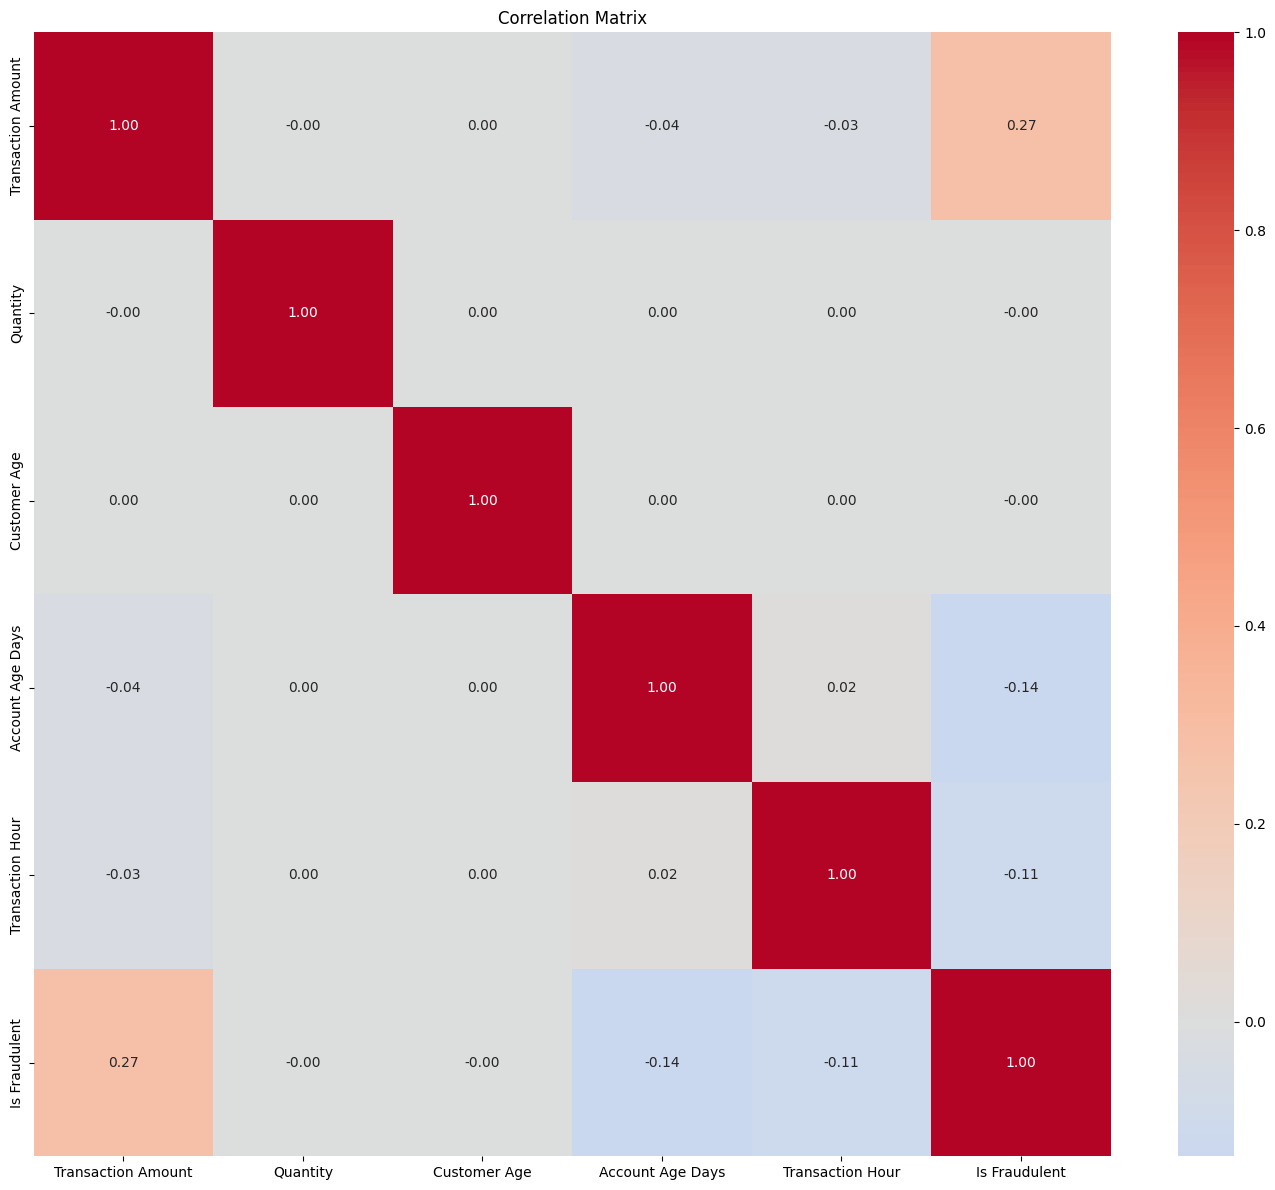

In [55]:
numerical_features = [
    "Transaction Amount",
    "Quantity",
    "Customer Age",
    "Account Age Days",
    "Transaction Hour"
]

categorical_features = [
    "Payment Method",
    "Product Category",
    "Customer Location",
    "Device Used"
]

plt.figure(figsize=(14, 12))
correlation_matrix = df[numerical_features + ['Is Fraudulent']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Data Preprocessing

### **Loading data**

In [6]:
df_train = pd.read_csv("./fraud_dataset/Fraudulent_E-Commerce_Transaction_Data.csv")
df_test = pd.read_csv("./fraud_dataset/Fraudulent_E-Commerce_Transaction_Data_2.csv")
df_train.head()


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [7]:
df_test.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


### **Sample datas for experiment(don't run if want full data)**

In [8]:
np.random.seed(123)
sample_indices = np.random.choice(df_train.index, size=min(200000, len(df_train)), replace=False)
df_train_sample = df_train.loc[sample_indices].copy()

In [9]:
print(f"Training samples: {len(df_train_sample)}")
print(f"Test samples: {len(df_test)}")
print(f"\nClass distribution in training:")
print(df_train_sample['Is Fraudulent'].value_counts())
print(f"\nFraud rate: {df_train_sample['Is Fraudulent'].mean()*100:.2f}%")
print(f"\nClass distribution in test:")
print(df_test['Is Fraudulent'].value_counts())
print(f"\nFraud rate: {df_test['Is Fraudulent'].mean()*100:.2f}%")

Training samples: 200000
Test samples: 23634

Class distribution in training:
Is Fraudulent
0    189896
1     10104
Name: count, dtype: int64

Fraud rate: 5.05%

Class distribution in test:
Is Fraudulent
0    22412
1     1222
Name: count, dtype: int64

Fraud rate: 5.17%


## **Preprocess  Without GNN**

In [33]:
train_no_gnn = df_train_sample.copy()
test_no_gnn = df_test.copy()
# Drop label from test set
test_no_gnn.drop(columns=["Is Fraudulent"], inplace=True, errors="ignore")

# === Label column ===
label_col = "Is Fraudulent"

train_no_gnn = train_no_gnn.sort_values(["Customer ID", "Transaction Date"])
test_no_gnn = test_no_gnn.sort_values(["Customer ID", "Transaction Date"])
train_no_gnn["Transaction Date"] = pd.to_datetime(train_no_gnn["Transaction Date"])
test_no_gnn["Transaction Date"] = pd.to_datetime(test_no_gnn["Transaction Date"])

In [34]:
# ---- Train aggregates (computed ONLY on train set)
cust_grp = train_no_gnn.groupby("Customer ID")

train_agg = cust_grp["Transaction Amount"].agg(
    customer_tx_count="count",
    customer_avg_amount="mean",
    customer_std_amount="std"
)

# number of unique IPs per customer (train only)
train_agg_ip = train_no_gnn.groupby("Customer ID")["IP Address"].nunique().to_frame("customer_n_unique_ip")

# Merge all train aggregates
train_agg = train_agg.join(train_agg_ip)

# Fill std=0 for customers with only 1 transaction
train_agg["customer_std_amount"] = train_agg["customer_std_amount"].fillna(0)

test_agg = train_agg.copy()


### **Feature Engineering**

In [35]:
for df in (train_no_gnn, test_no_gnn):
    # Transaction amount-based features
    df["customer_tx_count"] = df["Customer ID"].map(train_agg["customer_tx_count"]).fillna(0)
    df["customer_avg_amount"] = df["Customer ID"].map(train_agg["customer_avg_amount"]).fillna(0)
    df["customer_std_amount"] = df["Customer ID"].map(train_agg["customer_std_amount"]).fillna(0)
    df["customer_n_unique_ip"] = df["Customer ID"].map(train_agg["customer_n_unique_ip"]).fillna(0)
    # Time-based features
    df["prev_tx_time"] = df.groupby("Customer ID")["Transaction Date"].shift(1)
    df["hours_since_prev_tx"] = ((df["Transaction Date"] - df["prev_tx_time"]).dt.total_seconds() / 3600
    )
    df["hours_since_prev_tx"] = df["hours_since_prev_tx"].fillna(-1)
    df['Is Weekend'] = np.where(pd.to_datetime(df['Transaction Date']).dt.dayofweek >=5, "1", "0")
    # Address match feature
    df['Is Address Same'] = np.where(df.get("Shipping Address","") == df.get("Billing Address",""), "1", "0")

# # Transaction_Size: compute bins from train and apply same to test (use train qcut bins)
bins = pd.qcut(train_no_gnn['Transaction Amount'], q=5, retbins=True, duplicates='drop')[1]
train_no_gnn['Transaction_Size'] = pd.cut(train_no_gnn['Transaction Amount'], bins=bins,
                                          labels=['Very_Small','Small','Medium','Large','Very_Large'])
test_no_gnn['Transaction_Size'] = pd.cut(test_no_gnn['Transaction Amount'], bins=bins,
                                         labels=['Very_Small','Small','Medium','Large','Very_Large'])

# # Risk flags (quantile computed on train, applied to test using train's quantile if you want parity)
high_amount_threshold = train_no_gnn['Transaction Amount'].quantile(0.95)
high_quantity_threshold = train_no_gnn['Quantity'].quantile(0.95)


### **Remove Outliers**

In [36]:
if "Customer Age" in train_no_gnn.columns:
    age_mask = (train_no_gnn["Customer Age"] >= 0) & (train_no_gnn["Customer Age"] <= 120)
    print(f"Removing {(~age_mask).sum()} rows with invalid age")
    train_no_gnn = train_no_gnn[age_mask].reset_index(drop=True)

Removing 32 rows with invalid age


### **Drop Irrelevant Features**

In [ ]:
cols_to_drop = [
    "Shipping Address",
    "Billing Address", 
    "Transaction ID",
    "Customer ID",
    "IP Address",
    "Customer Location",
    "Transaction Date",  # Original datetime column
]

train_no_gnn.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test_no_gnn.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Drop any remaining datetime columns (safety check)
for df in (train_no_gnn, test_no_gnn):
    datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
    if datetime_cols:
        print(f"Found additional datetime columns to drop: {datetime_cols}")
        df.drop(columns=datetime_cols, inplace=True)

print(f"\nFinal train shape: {train_no_gnn.shape}")
print(f"Final test shape: {test_no_gnn.shape}")
print(f"\nRemaining columns:\n{train_no_gnn.columns.tolist()}")


Final train shape: (199968, 17)
Final test shape: (23634, 16)

Remaining columns:
['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity', 'Customer Age', 'Device Used', 'Is Fraudulent', 'Account Age Days', 'Transaction Hour', 'customer_tx_count', 'customer_avg_amount', 'customer_std_amount', 'customer_n_unique_ip', 'hours_since_prev_tx', 'Is Weekend', 'Is Address Same', 'Transaction_Size']


### **Encoding**

In [ ]:
OHE_THRESHOLD = 20
cat_cols = train_no_gnn.select_dtypes(include=["object","category"]).columns.tolist()
cat_cols = [c for c in cat_cols if c != label_col]
num_cols = [col for col in train_no_gnn.columns if col not in cat_cols and col != 'Address Match' and col != label_col]
print("Categorical cols:", cat_cols)
print("Numerical cols:", num_cols)

train_encoded = []
test_encoded = []

for col in cat_cols:
    unique_vals = train_no_gnn[col].nunique()
    print(f"{col}: {unique_vals} unique values")

    if unique_vals <= OHE_THRESHOLD:
        # --- Use OneHotEncoder ---
        encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        train_enc = pd.DataFrame(
            encoder.fit_transform(train_no_gnn[[col]]),
            columns=[f"{col}_{cat}" for cat in encoder.categories_[0]],
            index=train_no_gnn.index
        )
        test_enc = pd.DataFrame(
            encoder.transform(test_no_gnn[[col]]),
            columns=[f"{col}_{cat}" for cat in encoder.categories_[0]],
            index=test_no_gnn.index
        )
    else:
        # --- Use LabelEncoder ---
        encoder = LabelEncoder()
        # Align unknown labels in test set
        train_enc = train_no_gnn[[col]].copy()
        test_enc = test_no_gnn[[col]].copy()

        # Fit encoder on train + known test values
        encoder.fit(pd.concat([train_enc[col], test_enc[col]], axis=0).astype(str))

        train_enc[col] = encoder.transform(train_enc[col].astype(str))
        test_enc[col] = encoder.transform(test_enc[col].astype(str))

    train_encoded.append(train_enc)
    test_encoded.append(test_enc)

# Merge encoded categorical data
train_cats_encoded = pd.concat(train_encoded, axis=1)
test_cats_encoded = pd.concat(test_encoded, axis=1)
print("Encoded categorical shape (train):", train_cats_encoded.shape)
print("Encoded categorical shape (test):", test_cats_encoded.shape)

Categorical cols: ['Payment Method', 'Product Category', 'Device Used', 'Is Weekend', 'Is Address Same', 'Transaction_Size']
Numerical cols: ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour', 'customer_tx_count', 'customer_avg_amount', 'customer_std_amount', 'customer_n_unique_ip', 'hours_since_prev_tx']
Payment Method: 4 unique values
Product Category: 5 unique values
Device Used: 3 unique values
Is Weekend: 2 unique values
Is Address Same: 2 unique values
Transaction_Size: 5 unique values
Encoded categorical shape (train): (199968, 22)
Encoded categorical shape (test): (23634, 22)


### **Train-Test Split**

In [39]:
# Concatenate encoded categorical + numerical features
X_all = pd.concat([train_no_gnn[num_cols].reset_index(drop=True),
                   train_cats_encoded.reset_index(drop=True)], axis=1)
X_test = pd.concat([test_no_gnn[num_cols].reset_index(drop=True),
                    test_cats_encoded.reset_index(drop=True)], axis=1)

y_all = train_no_gnn[label_col].astype(int).reset_index(drop=True)

# Align columns (fill missing cols)
X_test = X_test.reindex(columns=X_all.columns, fill_value=0)

print("X_all.shape, y_all.shape:", X_all.shape, y_all.shape)

# === Split before SMOTE (to prevent data leakage) ===
X_train, X_val, y_train, y_val = train_test_split(
    X_all, y_all,
    test_size=0.3,
    stratify=y_all,
    random_state=42
)


X_all.shape, y_all.shape: (199968, 32) (199968,)


### **SMOTE-ENN**

In [40]:
USE_SMOTE = True

if USE_SMOTE:
    print("Applying SMOTEENN on training set only...")
    
    smote = SMOTE(
        random_state=42,
        sampling_strategy=0.3
    )
    
    smote_enn = SMOTEENN(
        smote=smote,
        random_state=42
    )
    
    X_train_clean_np, y_train_clean_np = smote_enn.fit_resample(
        X_train, y_train
    )
    
    X_train_clean = pd.DataFrame(
        X_train_clean_np, columns=X_train.columns
    )
    y_train_clean = pd.Series(
        y_train_clean_np, name=y_train.name
    )
    
    print("After SMOTEENN class counts:", np.bincount(y_train_clean))
else:
    print("Skipping SMOTEENN (using original training data).")
    X_train_clean, y_train_clean = X_train.copy(), y_train.copy()

print("Validation class counts:", np.bincount(y_val))
print(
    "Shapes -> Train:", X_train_clean.shape,
    "| Val:", X_val.shape,
    "| Test:", X_test.shape
)

X_train_clean.head().T

Applying SMOTEENN on training set only...
After SMOTEENN class counts: [106353  31187]
Validation class counts: [56961  3030]
Shapes -> Train: (137540, 32) | Val: (59991, 32) | Test: (23634, 32)


,0,1,2,3,4
Transaction Amount,308.1,545.43,44.73,302.88,20.79
Quantity,4.0,3.00,3.00,1.00,5.00
Customer Age,41.0,51.00,39.00,43.00,27.00
Account Age Days,251.0,325.00,33.00,130.00,213.00
Transaction Hour,3.0,12.00,15.00,23.00,0.00
customer_tx_count,1.0,1.00,1.00,1.00,1.00
customer_avg_amount,308.1,545.43,44.73,302.88,20.79
customer_std_amount,0.0,0.00,0.00,0.00,0.00
customer_n_unique_ip,1.0,1.00,1.00,1.00,1.00
hours_since_prev_tx,-1.0,-1.00,-1.00,-1.00,-1.00


### **Scaling**

In [41]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_clean),
    columns=X_train_clean.columns,
    index=X_train_clean.index
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val),
    columns=X_val.columns,
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [42]:
print("Final shapes:")
print(" X_train_scaled:", X_train_scaled.shape)
print(" X_val_scaled:  ", X_val_scaled.shape)
print(" X_test_scaled: ", X_test_scaled.shape)

Final shapes:
 X_train_scaled: (137540, 32)
 X_val_scaled:   (59991, 32)
 X_test_scaled:  (23634, 32)


## **Preprocess With GNN**

In [86]:
ARTIFACTS_DIR = "fraud_detection_artifacts"
os.makedirs(ARTIFACTS_DIR, exist_ok=True)
train_gnn = df_train_sample.copy()
test_gnn = df_test.copy()
test_gnn.drop(columns=["Is Fraudulent"], inplace=True, errors="ignore")

label_col = "Is Fraudulent"

train_gnn = train_gnn.sort_values(["Customer ID", "Transaction Date"])
test_gnn = test_gnn.sort_values(["Customer ID", "Transaction Date"])
train_gnn["Transaction Date"] = pd.to_datetime(train_gnn["Transaction Date"])
test_gnn["Transaction Date"] = pd.to_datetime(test_gnn["Transaction Date"])

In [87]:
train_gnn.groupby('Transaction Hour')['Is Fraudulent'].mean().sort_values(ascending=False)

Transaction Hour
5     0.111484
2     0.108278
1     0.107719
0     0.106747
4     0.102151
3     0.101312
8     0.033862
18    0.033130
20    0.031589
7     0.031382
17    0.031101
10    0.030813
19    0.030807
14    0.030528
23    0.030403
12    0.030395
15    0.030092
16    0.029894
22    0.029283
9     0.029211
6     0.029187
13    0.029100
11    0.027127
21    0.026227
Name: Is Fraudulent, dtype: float64

In [88]:
import pandas as pd

# Load your training data
train_df = pd.read_csv("./fraud_dataset/Fraudulent_E-Commerce_Transaction_Data.csv")

# Test transaction IDs
test_ids = [
    "a858dc67-2d9a-48d9-b89a-1a14cefa26c6",
    "710aef60-ff0b-4767-8f0a-fa4a72044a3a"
]

# Check for matches
matches = train_df[train_df["Transaction ID"].isin(test_ids)]

if len(matches) > 0:
    print("❌ DATA LEAKAGE DETECTED!")
    print(matches[["Transaction ID", "Transaction Amount", "Transaction Hour", "Is Fraudulent"]])
else:
    print("✅ No data leakage - these transactions are not in training set")
    
# Check similar patterns
print("\nChecking for similar fraud patterns in training data:")
fraud_train = train_df[train_df["Is Fraudulent"] == 1]

# Midnight transactions
midnight_fraud = fraud_train[fraud_train["Transaction Hour"] == 0]
print(f"  Midnight (hour=0) fraud: {len(midnight_fraud)}/{len(fraud_train)} ({len(midnight_fraud)/len(fraud_train)*100:.1f}%)")

# 2 AM transactions  
two_am_fraud = fraud_train[fraud_train["Transaction Hour"] == 2]
print(f"  2 AM (hour=2) fraud: {len(two_am_fraud)}/{len(fraud_train)} ({len(two_am_fraud)/len(fraud_train)*100:.1f}%)")

# High amount + high quantity
high_both = fraud_train[(fraud_train["Transaction Amount"] > 1000) & (fraud_train["Quantity"] >= 5)]
print(f"  High amount + high quantity fraud: {len(high_both)}/{len(fraud_train)} ({len(high_both)/len(fraud_train)*100:.1f}%)")

✅ No data leakage - these transactions are not in training set

Checking for similar fraud patterns in training data:
  Midnight (hour=0) fraud: 6754/73838 (9.1%)
  2 AM (hour=2) fraud: 6854/73838 (9.3%)
  High amount + high quantity fraud: 2427/73838 (3.3%)


In [89]:
global_statistics = {
    "global_avg_amount": float(train_gnn["Transaction Amount"].mean()),
    "global_std_amount": float(train_gnn["Transaction Amount"].std()),
    "global_median_amount": float(train_gnn["Transaction Amount"].median()),
    "global_avg_quantity": float(train_gnn["Quantity"].mean()),
    "global_median_quantity": float(train_gnn["Quantity"].median()),
    "global_median_age": float(train_gnn["Customer Age"].median()) if "Customer Age" in train_gnn.columns else 30.0,
    "global_median_account_age": float(train_gnn["Account Age Days"].median()) if "Account Age Days" in train_gnn.columns else 180.0,
}

with open(os.path.join(ARTIFACTS_DIR, "global_statistics.json"), "w") as f:
    json.dump(global_statistics, f, indent=2)

# Store entity IDs
train_customer_ids_gnn = train_gnn["Customer ID"].copy()
train_ips_gnn = train_gnn["IP Address"].copy()
train_shipping_addrs = train_gnn["Shipping Address"].copy()
train_billing_addrs = train_gnn["Billing Address"].copy()
train_devices = train_gnn.get("Device Used", pd.Series([None]*len(train_gnn))).copy()

test_customer_ids_gnn = test_gnn["Customer ID"].copy()
test_ips_gnn = test_gnn["IP Address"].copy()
test_shipping_addrs = test_gnn["Shipping Address"].copy()
test_billing_addrs = test_gnn["Billing Address"].copy()
test_devices = test_gnn.get("Device Used", pd.Series([None]*len(test_gnn))).copy()

### **Feature Engineering**

In [ ]:
if "Transaction Hour" in train_gnn.columns:
    hour_stats = train_gnn.groupby('Transaction Hour')['Is Fraudulent'].agg(['mean', 'count'])
    global_mean = train_gnn['Is Fraudulent'].mean()
    
    # Smoothing factor (alpha): Higher means more "dampening" of the Hour 0 spike
    # This prevents the model from seeing a "100% fraud rate" at any specific hour
    alpha = 50 
    hour_risk_score = (
        (hour_stats['mean'] * hour_stats['count'] + global_mean * alpha) / 
        (hour_stats['count'] + alpha)
    ).to_dict()
    
    # Identify high-risk hours for logic/logging, but use the score for training
    fraud_rate_threshold = hour_stats['mean'].quantile(0.75)
    high_risk_hours = hour_stats[hour_stats['mean'] >= fraud_rate_threshold].index.tolist()

    # Save config
    hour_risk_config = {
        "hour_risk_scores": {int(k): float(v) for k, v in hour_risk_score.items()},
        "global_mean": float(global_mean),
        "high_risk_hours": high_risk_hours
    }
    with open(os.path.join(ARTIFACTS_DIR, "hour_risk_config.json"), "w") as f:
        json.dump(hour_risk_config, f, indent=2)

# ================================================================================
# 2. FEATURE ENGINEERING LOOP
# ================================================================================
for df in (train_gnn, test_gnn):
    if "Transaction Hour" in df.columns:
        hour_raw = df["Transaction Hour"].copy()
    else:
        hour_raw = df['Transaction Date'].dt.hour
    
    # STRATEGY 1: Smoothed Target Encoding (The "Signal" without the "Spike")
    # This replaces the hard Is_High_Risk_Hour flag
    df['Hour_Risk_Score'] = hour_raw.map(hour_risk_score).fillna(global_mean)
    
    # STRATEGY 2: Cyclic encoding (Keep for continuity)
    df['Hour_Sin'] = np.sin(2 * np.pi * hour_raw / 24)
    df['Hour_Cos'] = np.cos(2 * np.pi * hour_raw / 24)
    
    # STRATEGY 3: Distance from Typical (Keep - good for "unusualness")
    typical_hours = [12, 13, 14, 15, 16, 17, 18]
    def distance_to_typical(h):
        distances = [min(abs(h - th), 24 - abs(h - th)) for th in typical_hours]
        return min(distances)
    df['Hour_Distance_From_Typical'] = hour_raw.apply(distance_to_typical)

    # Regular features
    df['Is Weekend'] = np.where(df['Transaction Date'].dt.dayofweek >= 5, 1, 0)
    df['Day_of_Week'] = df['Transaction Date'].dt.dayofweek
    
    df["Amount_to_GlobalAvg_Ratio"] = (
        df["Transaction Amount"] / global_statistics["global_avg_amount"]
    )
    df["Amount_Global_Deviation"] = (
        (df["Transaction Amount"] - global_statistics["global_avg_amount"]) 
        / global_statistics["global_std_amount"]
    )
    
    # STRATEGY 4: Refined Interactions
    # We use the Risk Score and Sin/Cos instead of Raw Hour to prevent hard-coding
    df['Hour_Risk_x_Amount'] = df['Hour_Risk_Score'] * df['Amount_to_GlobalAvg_Ratio']
    df['Hour_Sin_x_Amount'] = df['Hour_Sin'] * df['Amount_to_GlobalAvg_Ratio']
    df['Hour_Cos_x_Amount'] = df['Hour_Cos'] * df['Amount_to_GlobalAvg_Ratio']
    
    # Interaction with Address consistency
    df['Is_Address_Same'] = np.where(
        df.get("Shipping Address", "") == df.get("Billing Address", ""), 1, 0
    )
    df['Hour_Risk_x_AddressDiff'] = df['Hour_Risk_Score'] * (1 - df['Is_Address_Same'])

### **Remove Outliers**

In [91]:
if "Customer Age" in train_gnn.columns:
    age_mask = (train_gnn["Customer Age"] >= 0) & (train_gnn["Customer Age"] <= 120)
    print(f"\nRemoving {(~age_mask).sum()} rows with invalid age")
    train_gnn = train_gnn[age_mask].reset_index(drop=True)
    
    train_customer_ids_gnn = train_customer_ids_gnn[age_mask].reset_index(drop=True)
    train_ips_gnn = train_ips_gnn[age_mask].reset_index(drop=True)
    train_shipping_addrs = train_shipping_addrs[age_mask].reset_index(drop=True)
    train_billing_addrs = train_billing_addrs[age_mask].reset_index(drop=True)
    train_devices = train_devices[age_mask].reset_index(drop=True)



Removing 32 rows with invalid age


### **Drop Irrelevant Features**

In [92]:
cols_to_drop = [
    "Shipping Address", "Billing Address", "Transaction ID",
    "Customer ID", "IP Address", "Customer Location",
    "Transaction Date", "Transaction Hour", "Hour_Raw"
]

train_gnn.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test_gnn.drop(columns=cols_to_drop, inplace=True, errors='ignore')

for df in (train_gnn, test_gnn):
    datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
    if datetime_cols:
        df.drop(columns=datetime_cols, inplace=True)

print(f"\nFinal train shape: {train_gnn.shape}")
print(f"Final test shape: {test_gnn.shape}")


Final train shape: (199968, 21)
Final test shape: (23634, 20)


### **Encoding**

In [93]:
OHE_THRESHOLD = 20
cat_cols_gnn = train_gnn.select_dtypes(include=["object","category"]).columns.tolist()
cat_cols_gnn = [c for c in cat_cols_gnn if c != label_col]
num_cols_gnn = [col for col in train_gnn.columns if col not in cat_cols_gnn and col != label_col]

print("\nCategorical cols:", cat_cols_gnn)
print(f"Numerical cols: {len(num_cols_gnn)} features")

train_gnn_encoded = []
test_gnn_encoded = []
encoders_gnn = {}

for col in cat_cols_gnn:
    unique_vals = train_gnn[col].nunique()

    if unique_vals <= OHE_THRESHOLD:
        encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        train_enc = pd.DataFrame(
            encoder.fit_transform(train_gnn[[col]]),
            columns=[f"{col}_{cat}" for cat in encoder.categories_[0]],
            index=train_gnn.index
        )
        test_enc = pd.DataFrame(
            encoder.transform(test_gnn[[col]]),
            columns=[f"{col}_{cat}" for cat in encoder.categories_[0]],
            index=test_gnn.index
        )
    else:
        encoder = LabelEncoder()
        train_enc = train_gnn[[col]].copy()
        test_enc = test_gnn[[col]].copy()
        encoder.fit(pd.concat([train_enc[col], test_enc[col]], axis=0).astype(str))
        train_enc[col] = encoder.transform(train_enc[col].astype(str))
        test_enc[col] = encoder.transform(test_enc[col].astype(str))
    
    encoders_gnn[col] = encoder
    train_gnn_encoded.append(train_enc)
    test_gnn_encoded.append(test_enc)

train_cats_gnn_encoded = pd.concat(train_gnn_encoded, axis=1) if train_gnn_encoded else pd.DataFrame()
test_cats_gnn_encoded = pd.concat(test_gnn_encoded, axis=1) if test_gnn_encoded else pd.DataFrame()



Categorical cols: ['Payment Method', 'Product Category', 'Device Used']
Numerical cols: 17 features


### **Train-Test Split**

In [ ]:
X_all_gnn = pd.concat([
    train_gnn[num_cols_gnn].reset_index(drop=True),
    train_cats_gnn_encoded.reset_index(drop=True)
], axis=1)

X_test_gnn = pd.concat([
    test_gnn[num_cols_gnn].reset_index(drop=True),
    test_cats_gnn_encoded.reset_index(drop=True)
], axis=1)

y_all_gnn = train_gnn[label_col].astype(int).reset_index(drop=True)

X_test_gnn = X_test_gnn.reindex(columns=X_all_gnn.columns, fill_value=0)

X_train_gnn, X_val_gnn, y_train_gnn, y_val_gnn = train_test_split(
    X_all_gnn, y_all_gnn,
    test_size=0.3,
    stratify=y_all_gnn,
    random_state=42
)

train_indices = X_train_gnn.index
val_indices = X_val_gnn.index

train_customer_ids_split = train_customer_ids_gnn.iloc[train_indices].reset_index(drop=True)
train_ips_split = train_ips_gnn.iloc[train_indices].reset_index(drop=True)
train_shipping_split = train_shipping_addrs.iloc[train_indices].reset_index(drop=True)
train_billing_split = train_billing_addrs.iloc[train_indices].reset_index(drop=True)
train_devices_split = train_devices.iloc[train_indices].reset_index(drop=True)

### **SMOTE**

In [95]:
USE_SMOTE = False

if USE_SMOTE:
    print("\nApplying SMOTEENN...")
    smote = SMOTE(random_state=42, sampling_strategy=0.3)
    smote_enn = SMOTEENN(smote=smote, random_state=42)
    
    X_train_clean_gnn_np, y_train_clean_gnn_np = smote_enn.fit_resample(
        X_train_gnn, y_train_gnn
    )
    
    X_train_clean_gnn = pd.DataFrame(X_train_clean_gnn_np, columns=X_train_gnn.columns)
    y_train_clean_gnn = pd.Series(y_train_clean_gnn_np, name=y_train_gnn.name)
    
    print("After SMOTEENN class counts:", np.bincount(y_train_clean_gnn))
else:
    X_train_clean_gnn, y_train_clean_gnn = X_train_gnn.copy(), y_train_gnn.copy()

### **Scaling**

In [96]:
scaler_gnn = RobustScaler()

X_train_scaled_gnn = pd.DataFrame(
    scaler_gnn.fit_transform(X_train_clean_gnn),
    columns=X_train_clean_gnn.columns,
    index=X_train_clean_gnn.index
)

X_val_scaled_gnn = pd.DataFrame(
    scaler_gnn.transform(X_val_gnn),
    columns=X_val_gnn.columns,
    index=X_val_gnn.index
)

X_test_scaled_gnn = pd.DataFrame(
    scaler_gnn.transform(X_test_gnn),
    columns=X_test_gnn.columns,
    index=X_test_gnn.index
)

### **Graph Construction**

In [97]:
def build_smart_graph(features_df, customer_ids, ips, shipping_addrs=None, billing_addrs=None, 
                      devices=None, labels=None, k_similar=3):
    X = features_df.values.astype(np.float32)
    n_transactions = X.shape[0]
    
    entity_offset = n_transactions
    current_id = entity_offset
    
    customer_map = {}
    ip_map = {}
    ship_map = {}
    bill_map = {}
    device_map = {}
    
    for cid in pd.Series(customer_ids).dropna().unique():
        if cid not in customer_map:
            customer_map[cid] = current_id
            current_id += 1
    
    for ip in pd.Series(ips).dropna().unique():
        if ip not in ip_map:
            ip_map[ip] = current_id
            current_id += 1
    
    if shipping_addrs is not None:
        for addr in pd.Series(shipping_addrs).dropna().unique():
            if addr not in ship_map:
                ship_map[addr] = current_id
                current_id += 1
    
    if billing_addrs is not None:
        for addr in pd.Series(billing_addrs).dropna().unique():
            if addr not in bill_map:
                bill_map[addr] = current_id
                current_id += 1
    
    if devices is not None:
        for dev in pd.Series(devices).dropna().unique():
            if dev not in device_map:
                device_map[dev] = current_id
                current_id += 1
    
    total_nodes = current_id
    n_entities = total_nodes - n_transactions
    
    print(f"  Graph: {n_transactions} transactions + {n_entities} entities = {total_nodes} nodes")
    
    edges = []
    edge_types = []
    
    for tx_idx in range(n_transactions):
        cid = customer_ids[tx_idx]
        if cid is not None and cid == cid and cid in customer_map:
            entity_node = customer_map[cid]
            edges.extend([(tx_idx, entity_node), (entity_node, tx_idx)])
            edge_types.extend([0, 0])
        
        ip = ips[tx_idx]
        if ip is not None and ip == ip and ip in ip_map:
            entity_node = ip_map[ip]
            edges.extend([(tx_idx, entity_node), (entity_node, tx_idx)])
            edge_types.extend([1, 1])
        
        if shipping_addrs is not None:
            ship = shipping_addrs[tx_idx]
            if ship is not None and ship == ship and ship in ship_map:
                entity_node = ship_map[ship]
                edges.extend([(tx_idx, entity_node), (entity_node, tx_idx)])
                edge_types.extend([2, 2])
        
        if billing_addrs is not None:
            bill = billing_addrs[tx_idx]
            if bill is not None and bill == bill and bill in bill_map:
                entity_node = bill_map[bill]
                edges.extend([(tx_idx, entity_node), (entity_node, tx_idx)])
                edge_types.extend([3, 3])
        
        if devices is not None:
            dev = devices[tx_idx]
            if dev is not None and dev == dev and dev in device_map:
                entity_node = device_map[dev]
                edges.extend([(tx_idx, entity_node), (entity_node, tx_idx)])
                edge_types.extend([4, 4])
    
    if k_similar > 0 and n_transactions > k_similar:
        pca_dim = min(16, X.shape[1])
        pca = PCA(n_components=pca_dim, random_state=42)
        X_reduced = pca.fit_transform(X)
        
        nbrs = NearestNeighbors(n_neighbors=k_similar+1, algorithm="ball_tree", n_jobs=-1)
        nbrs.fit(X_reduced)
        _, neighbors = nbrs.kneighbors(X_reduced)
        
        for i in range(n_transactions):
            for j in neighbors[i][1:]:
                if i != j:
                    edges.append((i, int(j)))
                    edge_types.append(5)
    
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    edge_type = torch.tensor(edge_types, dtype=torch.long)
    
    print(f"  Total edges: {edge_index.shape[1]:,}")
    
    entity_feat_dim = X.shape[1]
    entity_features = np.zeros((n_entities, entity_feat_dim), dtype=np.float32)
    
    customer_tx_features = defaultdict(list)
    for tx_idx, cid in enumerate(customer_ids):
        if cid is not None and cid == cid and cid in customer_map:
            customer_tx_features[cid].append(X[tx_idx])
    
    for cid, feats in customer_tx_features.items():
        entity_idx = customer_map[cid] - entity_offset
        entity_features[entity_idx] = np.mean(feats, axis=0)
    
    ip_tx_features = defaultdict(list)
    for tx_idx, ip in enumerate(ips):
        if ip is not None and ip == ip and ip in ip_map:
            ip_tx_features[ip].append(X[tx_idx])
    
    for ip, feats in ip_tx_features.items():
        entity_idx = ip_map[ip] - entity_offset
        entity_features[entity_idx] = np.mean(feats, axis=0)
    
    all_features = np.vstack([X, entity_features])
    x = torch.tensor(all_features, dtype=torch.float32)
    
    if labels is not None:
        y = np.full(total_nodes, -1, dtype=np.int64)
        y[:n_transactions] = labels
        y = torch.tensor(y, dtype=torch.long)
    else:
        y = None
    
    train_mask = torch.zeros(total_nodes, dtype=torch.bool)
    train_mask[:n_transactions] = True
    
    data = Data(x=x, edge_index=edge_index, edge_type=edge_type, y=y, train_mask=train_mask)
    data.n_transactions = n_transactions
    data.n_entities = n_entities
    
    return data

In [98]:
train_graph_gnn = build_smart_graph(
    X_train_scaled_gnn,
    train_customer_ids_split.values,
    train_ips_split.values,
    shipping_addrs=train_shipping_split.values,
    billing_addrs=train_billing_split.values,
    devices=train_devices_split.values,
    labels=y_train_clean_gnn.values,
    k_similar=3
)

test_graph_gnn = build_smart_graph(
    X_test_scaled_gnn,
    test_customer_ids_gnn.values,
    test_ips_gnn.values,
    shipping_addrs=test_shipping_addrs.values,
    billing_addrs=test_billing_addrs.values,
    devices=test_devices.values,
    labels=None,
    k_similar=3
)

  Graph: 139977 transactions + 559910 entities = 699887 nodes
  Total edges: 1,819,701
  Graph: 23634 transactions + 94539 entities = 118173 nodes
  Total edges: 307,242


### **GraphSAGE Encoder**

In [ ]:
class GraphSAGEClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes=2, dropout=0.3, num_layers=2):
        super().__init__()
        self.num_layers = num_layers
        self.dropout = dropout
        
        self.convs = nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        for _ in range(num_layers - 1):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels))
        
        self.embedding_dim = hidden_channels
        self.classifier = nn.Linear(hidden_channels, num_classes)
        
    def forward(self, x, edge_index, return_embedding=False):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            x = F.relu(x)
            if i < len(self.convs) - 1:
                x = F.dropout(x, p=self.dropout, training=self.training)
        
        if return_embedding:
            return x
        
        out = self.classifier(x)
        return out
    
    def get_embeddings(features_df, customer_ids, ips, model_encoder=None):
        """
        Constructs the graph and generates embeddings.
        If model_encoder is None, it returns raw features (for training).
        """
        data = build_smart_graph(features_df, customer_ids, ips, k_similar=0) # k=0 for speed in prod
        
        if model_encoder:
            model_encoder.eval()
            with torch.no_grad():
                emb = model_encoder.get_embedding(data.x, data.edge_index)
                # CRITICAL: Only return the transaction nodes (not the entity nodes)
                return emb[:data.n_transactions].numpy()
        return data

def train_graph_autoencoder(data, embedding_dim=32, epochs=50, lr=0.01, 
                           weight_decay=1e-4, use_focal_loss=True):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Training on device: {device}")
    
    data = data.to(device)
    
    train_labels = data.y[data.train_mask]
    fraud_count = (train_labels == 1).sum().item()
    non_fraud_count = (train_labels == 0).sum().item()
    pos_weight = non_fraud_count / fraud_count if fraud_count > 0 else 1.0
    
    print(f"Class distribution: Non-fraud={non_fraud_count}, Fraud={fraud_count}")
    
    in_channels = data.x.shape[1]
    model = GraphSAGEClassifier(
        in_channels=in_channels,
        hidden_channels=embedding_dim,
        num_classes=2,
        dropout=0.3,
        num_layers=3
    ).to(device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    class FocalLoss(nn.Module):
        def __init__(self, alpha=0.25, gamma=2.0):
            super().__init__()
            self.alpha = alpha
            self.gamma = gamma
        
        def forward(self, inputs, targets):
            ce_loss = F.cross_entropy(inputs, targets, reduction='none')
            pt = torch.exp(-ce_loss)
            focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
            return focal_loss.mean()
    
    criterion = FocalLoss(alpha=0.25, gamma=2.0) if use_focal_loss else nn.CrossEntropyLoss(
        weight=torch.tensor([1.0, pos_weight], device=device)
    )
    
    model.train()
    best_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        out = model(data.x, data.edge_index)
        train_out = out[data.train_mask]
        train_labels = data.y[data.train_mask]
        
        valid_mask = train_labels >= 0
        train_out = train_out[valid_mask]
        train_labels = train_labels[valid_mask]
        
        loss = criterion(train_out, train_labels)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            pred = train_out.argmax(dim=1)
            
            tp = ((pred == 1) & (train_labels == 1)).sum().item()
            fp = ((pred == 1) & (train_labels == 0)).sum().item()
            fn = ((pred == 0) & (train_labels == 1)).sum().item()
            
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}, F1: {f1:.4f}, Recall: {recall:.4f}")
        
        if loss.item() < best_loss:
            best_loss = loss.item()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= 10:
                print(f"Early stopping at epoch {epoch+1}")
                break
    
    model.eval()
    return model.cpu(), None

### **Generating GNN Embeddings**

In [100]:
embedding_dim = 16
encoder_gnn, decoder_gnn = train_graph_autoencoder(
    train_graph_gnn, 
    embedding_dim=embedding_dim, 
    epochs=30, 
    lr=0.01
)

with torch.no_grad():
    train_emb_all_nodes = encoder_gnn(train_graph_gnn.x, train_graph_gnn.edge_index).numpy()
    test_emb_all_nodes = encoder_gnn(test_graph_gnn.x, test_graph_gnn.edge_index).numpy()

n_train_transactions = len(X_train_scaled_gnn)
n_test_transactions = len(X_test_scaled_gnn)

train_emb_gnn = train_emb_all_nodes[:n_train_transactions]
test_emb_gnn = test_emb_all_nodes[:n_test_transactions]

Training on device: cpu
Class distribution: Non-fraud=132906, Fraud=7071
Epoch 5/30 - Loss: 0.0275, F1: 0.0000, Recall: 0.0000
Epoch 10/30 - Loss: 0.0183, F1: 0.0000, Recall: 0.0000
Epoch 15/30 - Loss: 0.0152, F1: 0.0000, Recall: 0.0000
Epoch 20/30 - Loss: 0.0135, F1: 0.0000, Recall: 0.0000
Epoch 25/30 - Loss: 0.0132, F1: 0.0000, Recall: 0.0000
Epoch 30/30 - Loss: 0.0128, F1: 0.0000, Recall: 0.0000


In [101]:
np.save(os.path.join(ARTIFACTS_DIR, "gnn_node_embeddings.npy"), train_emb_all_nodes.astype(np.float32))

if train_emb_all_nodes.shape[0] > n_train_transactions:
    entity_emb_train = train_emb_all_nodes[n_train_transactions:, :]
    mean_entity_emb = np.mean(entity_emb_train, axis=0)
    min_entity_emb = np.min(entity_emb_train, axis=0)
    max_entity_emb = np.max(entity_emb_train, axis=0)
else:
    mean_entity_emb = np.mean(train_emb_gnn, axis=0)
    min_entity_emb = np.min(train_emb_gnn, axis=0)
    max_entity_emb = np.max(train_emb_gnn, axis=0)

mean_entity_emb = mean_entity_emb.astype(np.float32)

np.save(os.path.join(ARTIFACTS_DIR, "mean_gnn_embedding.npy"), mean_entity_emb)
np.save(os.path.join(ARTIFACTS_DIR, "gnn_min.npy"), min_entity_emb)
np.save(os.path.join(ARTIFACTS_DIR, "gnn_max.npy"), max_entity_emb)

### **Concatenate Features**

In [102]:
X_train_with_gnn = np.concatenate([X_train_scaled_gnn.values, train_emb_gnn], axis=1)
X_val_with_gnn = np.concatenate([X_val_scaled_gnn.values, train_emb_gnn[:len(X_val_scaled_gnn)]], axis=1)
X_test_with_gnn = np.concatenate([X_test_scaled_gnn.values, test_emb_gnn], axis=1)

tab_cols = X_train_scaled_gnn.columns.tolist()
emb_cols = [f"gnn_emb_{i}" for i in range(train_emb_gnn.shape[1])]

X_train_with_gnn_df = pd.DataFrame(X_train_with_gnn, columns=tab_cols + emb_cols)
X_val_with_gnn_df = pd.DataFrame(X_val_with_gnn, columns=tab_cols + emb_cols)
X_test_with_gnn_df = pd.DataFrame(X_test_with_gnn, columns=tab_cols + emb_cols)

print("\n✓ GNN embeddings concatenated")
print(f"Train shape: {X_train_with_gnn_df.shape}")


✓ GNN embeddings concatenated
Train shape: (139977, 31)


# **Modelling**

## **Without GNN**

### **5-Fold Cross Validation**

In [ ]:
USE_CROSS_VAL = True

def evaluate_cv(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {
        "f1": [], 
        "precision": [], 
        "recall": [], 
        "accuracy": [], 
        "roc_auc": [],
        "pr_auc": []  # ← ADD THIS
    }

    for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y), start=1):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_va)

        # predict_proba fallback
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_va)[:, 1]
        else:
            y_proba = y_pred

        metrics["f1"].append(f1_score(y_va, y_pred))
        metrics["precision"].append(precision_score(y_va, y_pred, zero_division=0))
        metrics["recall"].append(recall_score(y_va, y_pred, zero_division=0))
        metrics["accuracy"].append(accuracy_score(y_va, y_pred))
        
        try:
            metrics["roc_auc"].append(roc_auc_score(y_va, y_proba))
        except Exception:
            metrics["roc_auc"].append(np.nan)
        try:
            metrics["pr_auc"].append(average_precision_score(y_va, y_proba))
        except Exception:
            metrics["pr_auc"].append(np.nan)

        print(f"  Fold {fold}: F1={metrics['f1'][-1]:.4f}, "
              f"ROC-AUC={metrics['roc_auc'][-1] if not np.isnan(metrics['roc_auc'][-1]) else 'nan'}, "
              f"PR-AUC={metrics['pr_auc'][-1] if not np.isnan(metrics['pr_auc'][-1]) else 'nan'}")  # ← ADD PR-AUC TO PRINT

    avg = {k: np.nanmean(v) for k, v in metrics.items()}
    return avg

### **Hyperparameter Tuning Configuration**

In [ ]:
USE_HYPERPARAMETER_TUNING = False

param_grids = {
    "ANN": {
        'hidden_layer_sizes': [(64, 32), (128, 64, 32), (256, 128, 64)],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [300, 500]
    },
    
    "RandomForest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 6, 8, 10],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'gamma': [0, 0.1, 0.2]
    },
    
    "LightGBM": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 6, 8, 10],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'num_leaves': [31, 50, 70]
    },
    
    "CatBoost": {
        'iterations': [100, 200, 300],
        'depth': [4, 6, 8, 10],
        'learning_rate': [0.01, 0.03, 0.1],
        'l2_leaf_reg': [1, 3, 5, 7]
    }
}

### **Perform Hyperparameter Tuning**

In [ ]:
# Store best parameters for each model
best_params = {}

if USE_HYPERPARAMETER_TUNING:
    print("\n===== HYPERPARAMETER TUNING WITH RANDOMIZED SEARCH =====")
    print("This may take several minutes...\n")
    
    # Define base models for tuning
    base_models = {
        "ANN": MLPClassifier(random_state=42, early_stopping=True),
        "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1),
        "XGBoost": XGBClassifier(
            eval_metric="logloss",
            use_label_encoder=False,
            random_state=42,
            n_jobs=-1
        ),
        "LightGBM": LGBMClassifier(
            is_unbalance=True,
            random_state=42,
            n_jobs=-1,
            verbose=-1
        ),
        "CatBoost": CatBoostClassifier(
            auto_class_weights='Balanced',
            verbose=False,
            random_state=42
        )
    }
    
    # Perform RandomizedSearchCV for each model
    for name, base_model in base_models.items():
        print(f"Tuning {name}...")
        
        # Use RandomizedSearchCV (faster than GridSearchCV)
        random_search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_grids[name],
            n_iter=20,  # Number of parameter settings sampled
            cv=3,  # 3-fold cross-validation
            scoring='f1',  # Optimize for F1 score
            n_jobs=-1,
            verbose=1,
            random_state=42
        )
        
        # Fit on training data
        random_search.fit(X_train_scaled, y_train_clean)
        
        # Store best parameters
        best_params[name] = random_search.best_params_
        
        print(f"  ✓ Best F1 Score: {random_search.best_score_:.4f}")
        print(f"  ✓ Best Parameters: {random_search.best_params_}\n")
    
    print("Hyperparameter tuning completed!")
else:
    print("\n===== SKIPPING HYPERPARAMETER TUNING (USE_HYPERPARAMETER_TUNING=False) =====")
    print("Using default hyperparameters for all models.\n")


===== SKIPPING HYPERPARAMETER TUNING (USE_HYPERPARAMETER_TUNING=False) =====
Using default hyperparameters for all models.



In [ ]:
# Build models with best hyperparameters (if tuning was performed)
if USE_HYPERPARAMETER_TUNING and best_params:
    print("Building models with tuned hyperparameters...\n")

    params = best_params

else:
    print("Building models with predefined best hyperparameters...\n")

    # Fallback to best hyperparameters found earlier
    params = {
        "ANN": {
            "max_iter": 500,
            "learning_rate_init": 0.01,
            "hidden_layer_sizes": (64, 32),
            "alpha": 0.0001
        },
        "RandomForest": {
            "n_estimators": 200,
            "min_samples_split": 2,
            "min_samples_leaf": 1,
            "max_features": "log2",
            "max_depth": None
        },
        "XGBoost": {
            "n_estimators": 200,
            "learning_rate": 0.1,
            "max_depth": 10,
            "subsample": 0.8,
            "colsample_bytree": 0.9,
            "gamma": 0.2
        },
        "LightGBM": {
            "n_estimators": 200,
            "learning_rate": 0.01,
            "max_depth": 8,
            "num_leaves": 70,
            "subsample": 0.8,
            "colsample_bytree": 0.7
        },
        "CatBoost": {
            "iterations": 100,
            "learning_rate": 0.01,
            "depth": 8,
            "l2_leaf_reg": 5
        }
    }

# Final model construction (shared)
models = {
    "ANN": MLPClassifier(
        **params["ANN"],
        random_state=42,
        early_stopping=True
    ),

    "RandomForest": RandomForestClassifier(
        **params["RandomForest"],
        random_state=42,
        n_jobs=-1
    ),

    "XGBoost": XGBClassifier(
        **params["XGBoost"],
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    ),

    "LightGBM": LGBMClassifier(
        **params["LightGBM"],
        is_unbalance=True,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ),

    "CatBoost": CatBoostClassifier(
        **params["CatBoost"],
        auto_class_weights="Balanced",
        verbose=False,
        random_state=42
    )
}


cv_no_gnn_results = {}
val_no_gnn_results = {}

Building models with predefined best hyperparameters...



### **Best Hyperparameters Summary**

In [ ]:
# Display best hyperparameters found during tuning
if USE_HYPERPARAMETER_TUNING and best_params:
    print("=" * 80)
    print("BEST HYPERPARAMETERS FOUND")
    print("=" * 80)
    
    for model_name, params in best_params.items():
        print(f"\n{model_name}:")
        print("-" * 40)
        for param_name, param_value in params.items():
            print(f"  {param_name}: {param_value}")
    
    print("\n" + "=" * 80)
    
    # Create a DataFrame for better visualization
    import pandas as pd
    
    # Convert best_params to a more readable format
    params_list = []
    for model_name, params in best_params.items():
        for param_name, param_value in params.items():
            params_list.append({
                'Model': model_name,
                'Parameter': param_name,
                'Best Value': param_value
            })
    
    if params_list:
        best_params_df = pd.DataFrame(params_list)
        print("\nBest Hyperparameters DataFrame:")
        print(best_params_df.to_string(index=False))
else:
    print("Hyperparameter tuning was not performed or no parameters were found.")

Hyperparameter tuning was not performed or no parameters were found.


### **Training**


===== 5-FOLD CV ON RESAMPLED TRAINING SET =====

-- ANN --
  Fold 1: F1=0.9161, ROC-AUC=0.972500800819482, PR-AUC=0.9570721946496696
  Fold 2: F1=0.9206, ROC-AUC=0.9763008764779564, PR-AUC=0.9624668548885714
  Fold 3: F1=0.9225, ROC-AUC=0.9756251406385392, PR-AUC=0.9610763184395996
  Fold 4: F1=0.9170, ROC-AUC=0.9736420226788419, PR-AUC=0.9582270498484051
  Fold 5: F1=0.9211, ROC-AUC=0.9734282186631431, PR-AUC=0.9589648391420457
 Avg -> F1: 0.9195, Precision: 0.9661, Recall: 0.8772, Acc: 0.9652, ROC-AUC: 0.9743

-- RandomForest --
  Fold 1: F1=0.9359, ROC-AUC=0.9804902231053643, PR-AUC=0.9688726532884414
  Fold 2: F1=0.9393, ROC-AUC=0.9836352952489162, PR-AUC=0.9724528837159028
  Fold 3: F1=0.9363, ROC-AUC=0.9809731720705973, PR-AUC=0.9697050098792541
  Fold 4: F1=0.9330, ROC-AUC=0.9790380379411686, PR-AUC=0.96617171554475
  Fold 5: F1=0.9352, ROC-AUC=0.9816126963770438, PR-AUC=0.9695344164463187
 Avg -> F1: 0.9359, Precision: 0.9761, Recall: 0.8989, Acc: 0.9721, ROC-AUC: 0.9811

-- X

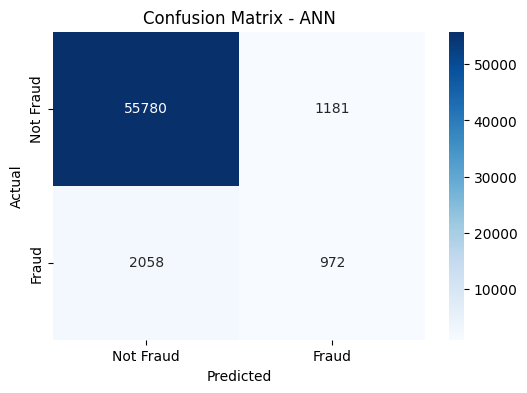


--> Final training and evaluation: RandomForest
Accuracy: 0.9444
PR-AUC: 0.3460
Confusion Matrix:
 [[55632  1329]
 [ 2005  1025]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     56961
           1       0.44      0.34      0.38      3030

    accuracy                           0.94     59991
   macro avg       0.70      0.66      0.68     59991
weighted avg       0.94      0.94      0.94     59991



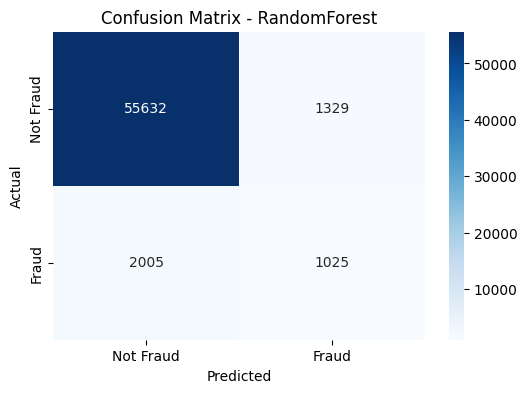


--> Final training and evaluation: XGBoost
Accuracy: 0.9429
PR-AUC: 0.3478
Confusion Matrix:
 [[55526  1435]
 [ 1991  1039]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     56961
           1       0.42      0.34      0.38      3030

    accuracy                           0.94     59991
   macro avg       0.69      0.66      0.67     59991
weighted avg       0.94      0.94      0.94     59991



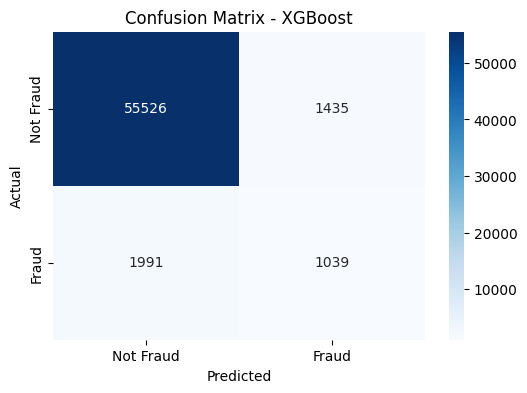


--> Final training and evaluation: LightGBM
Accuracy: 0.9274
PR-AUC: 0.3590
Confusion Matrix:
 [[54309  2652]
 [ 1704  1326]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     56961
           1       0.33      0.44      0.38      3030

    accuracy                           0.93     59991
   macro avg       0.65      0.70      0.67     59991
weighted avg       0.94      0.93      0.93     59991



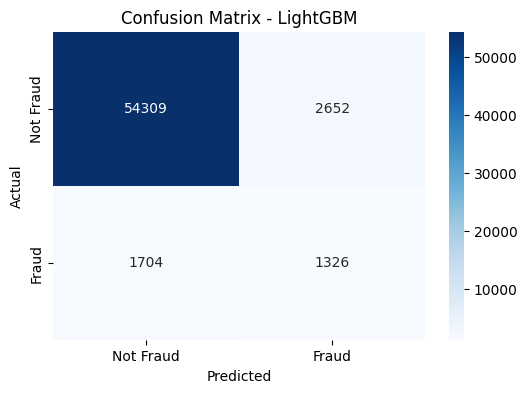


--> Final training and evaluation: CatBoost
Accuracy: 0.8904
PR-AUC: 0.3495
Confusion Matrix:
 [[51791  5170]
 [ 1407  1623]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     56961
           1       0.24      0.54      0.33      3030

    accuracy                           0.89     59991
   macro avg       0.61      0.72      0.64     59991
weighted avg       0.94      0.89      0.91     59991



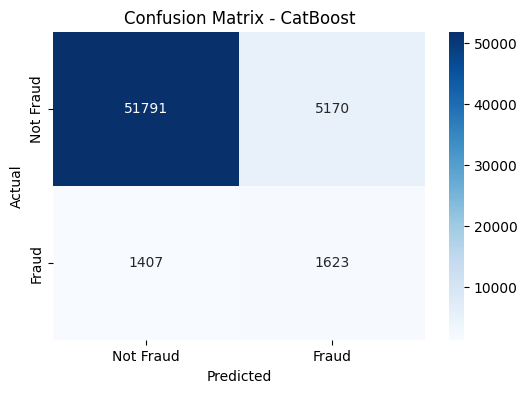


===== VALIDATION (HOLD-OUT) METRICS =====


,f1,precision,recall,accuracy,roc_auc,pr_auc
ANN,0.375072,0.451463,0.320792,0.946009,0.798389,0.350669
RandomForest,0.380758,0.435429,0.338284,0.944425,0.791083,0.346020
XGBoost,0.377544,0.419968,0.342904,0.942891,0.791798,0.347785
LightGBM,0.378425,0.333333,0.437624,0.927389,0.806602,0.358950
CatBoost,0.330449,0.238922,0.535644,0.890367,0.805537,0.349488


In [ ]:
if USE_CROSS_VAL:
    print("\n===== 5-FOLD CV ON RESAMPLED TRAINING SET =====")
    for name, mdl in models.items():
        print(f"\n-- {name} --")
        avg_metrics = evaluate_cv(mdl, X_train_scaled, y_train_clean, n_splits=5)
        cv_no_gnn_results[name] = avg_metrics
        print(f" Avg -> F1: {avg_metrics['f1']:.4f}, Precision: {avg_metrics['precision']:.4f}, "
              f"Recall: {avg_metrics['recall']:.4f}, Acc: {avg_metrics['accuracy']:.4f}, ROC-AUC: {avg_metrics['roc_auc']:.4f}")
else:
    print("\n===== SKIPPING CROSS-VALIDATION (use_cross_val=False) =====")

test_preds_df = X_test_scaled.copy().reset_index(drop=True)
print("\n===== TRAIN FINAL MODELS ON FULL RESAMPLED TRAINING SET & EVALUATE ON HOLD-OUT VALIDATION =====")
results_summary = []

for name, mdl in models.items():
    print(f"\n--> Final training and evaluation: {name}")
    mdl.fit(X_train_scaled, y_train_clean)

    # Predictions
    y_val_pred = mdl.predict(X_val_scaled)
    if hasattr(mdl, "predict_proba"):
        y_val_proba = mdl.predict_proba(X_val_scaled)[:, 1]
    else:
        y_val_proba = y_val_pred

    # Compute metrics
    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, zero_division=0)
    rec = recall_score(y_val, y_val_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val, y_val_proba) if len(np.unique(y_val_proba)) > 1 else np.nan
    
    # ← ADD PR-AUC HERE
    try:
        pr_auc = average_precision_score(y_val, y_val_proba)
    except Exception:
        pr_auc = np.nan
    
    cm = confusion_matrix(y_val, y_val_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")  # ← ADD THIS LINE
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_val, y_val_pred))

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Store metrics
    val_metrics = {
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "accuracy": acc,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc  # ← ADD THIS
    }
    val_no_gnn_results[name] = val_metrics
    results_summary.append((name, acc, f1, prec, rec, roc_auc, pr_auc))  # ← ADD pr_auc

    # Predictions on test
    if hasattr(mdl, "predict_proba"):
        test_probs = mdl.predict_proba(X_test_scaled)[:, 1]
    else:
        test_probs = mdl.predict(X_test_scaled)

    test_preds_df[f"{name}_prob"] = test_probs
    test_preds_df[f"{name}_pred"] = (test_probs >= 0.5).astype(int)

# Display tabular summary
val_no_gnn_summary = pd.DataFrame(val_no_gnn_results).T
print("\n===== VALIDATION (HOLD-OUT) METRICS =====")
display(val_no_gnn_summary)


### **Model Summary**

In [ ]:
# CV summary
cv_no_gnn_summary = pd.DataFrame(cv_no_gnn_results).T
print("\nCV AVERAGE METRICS (5-fold on resampled train):")
display(cv_no_gnn_summary)

# Validation summary
val_no_gnn_summary = pd.DataFrame(val_no_gnn_results).T
print("\nValidation (hold-out) metrics:")
display(val_no_gnn_summary)



CV AVERAGE METRICS (5-fold on resampled train):


,f1,precision,recall,accuracy,roc_auc,pr_auc
ANN,0.919459,0.966060,0.877225,0.965152,0.974299,0.959561
RandomForest,0.935918,0.976090,0.898932,0.972088,0.981150,0.969347
XGBoost,0.935432,0.976461,0.897714,0.971899,0.980633,0.969520
LightGBM,0.921139,0.940196,0.902844,0.964948,0.978451,0.964079
CatBoost,0.888471,0.851904,0.928336,0.947150,0.977996,0.964444



Validation (hold-out) metrics:


,f1,precision,recall,accuracy,roc_auc,pr_auc
ANN,0.375072,0.451463,0.320792,0.946009,0.798389,0.350669
RandomForest,0.380758,0.435429,0.338284,0.944425,0.791083,0.346020
XGBoost,0.377544,0.419968,0.342904,0.942891,0.791798,0.347785
LightGBM,0.378425,0.333333,0.437624,0.927389,0.806602,0.358950
CatBoost,0.330449,0.238922,0.535644,0.890367,0.805537,0.349488


## **With GNN**

### **5-Fold Cross Validation**

In [115]:
USE_CROSS_VAL = True

def evaluate_cv(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {"f1": [], "precision": [], "recall": [], "accuracy": [], "roc_auc": []}

    for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y), start=1):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_va)

        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_va)[:, 1]
        else:
            y_proba = y_pred

        metrics["f1"].append(f1_score(y_va, y_pred))
        metrics["precision"].append(precision_score(y_va, y_pred, zero_division=0))
        metrics["recall"].append(recall_score(y_va, y_pred, zero_division=0))
        metrics["accuracy"].append(accuracy_score(y_va, y_pred))
        try:
            metrics["roc_auc"].append(roc_auc_score(y_va, y_proba))
        except Exception:
            metrics["roc_auc"].append(np.nan)

        print(f"  Fold {fold}: F1={metrics['f1'][-1]:.4f}, Recall={metrics['recall'][-1]:.4f}")

    avg = {k: np.nanmean(v) for k, v in metrics.items()}
    return avg

### **Hyperparameter Tuning Configuration**

In [116]:
USE_HYPERPARAMETER_TUNING = False

# Define hyperparameter grids for each model
param_grids_gnn = {
    "ANN": {
        'hidden_layer_sizes': [(64, 32), (128, 64, 32), (256, 128, 64)],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [300, 500]
    },
    
    "RandomForest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 6, 8, 10],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'gamma': [0, 0.1, 0.2]
    },
    
    "LightGBM": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.03, 0.1],
        'max_depth': [3, 6, 8, 10],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'num_leaves': [31, 50, 70]
    },
    
    "CatBoost": {
        'iterations': [100, 200, 300],
        'depth': [4, 6, 8, 10],
        'learning_rate': [0.01, 0.03, 0.1],
        'l2_leaf_reg': [1, 3, 5, 7]
    }
}

print("Hyperparameter grids defined for all models (GNN).")

Hyperparameter grids defined for all models (GNN).


### **Perform Hyperparameter Tuning**

In [117]:
best_params_gnn = {}

if USE_HYPERPARAMETER_TUNING:
    print("\n===== HYPERPARAMETER TUNING WITH RANDOMIZED SEARCH (GNN) =====")
    print("This may take several minutes...\n")
    
    # Define base models for tuning
    base_models_gnn = {
        "ANN": MLPClassifier(random_state=42, early_stopping=True),
        "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1),
        "XGBoost": XGBClassifier(
            eval_metric="logloss",
            use_label_encoder=False,
            random_state=42,
            n_jobs=-1
        ),
        "LightGBM": LGBMClassifier(
            is_unbalance=True,
            random_state=42,
            n_jobs=-1,
            verbose=-1
        ),
        "CatBoost": CatBoostClassifier(
            auto_class_weights='Balanced',
            verbose=False,
            random_state=42
        )
    }
    
    # Perform RandomizedSearchCV for each model
    for name, base_model in base_models_gnn.items():
        print(f"Tuning {name}...")
        
        # Use RandomizedSearchCV (faster than GridSearchCV)
        random_search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_grids_gnn[name],
            n_iter=20,  # Number of parameter settings sampled
            cv=3,  # 3-fold cross-validation
            scoring='f1',  # Optimize for F1 score
            n_jobs=-1,
            verbose=1,
            random_state=42
        )
        
        # Fit on training data
        random_search.fit(X_train_with_gnn_df, y_train_clean_gnn)
        
        # Store best parameters
        best_params_gnn[name] = random_search.best_params_
        
        print(f"  ✓ Best F1 Score: {random_search.best_score_:.4f}")
        print(f"  ✓ Best Parameters: {random_search.best_params_}\n")
    
    print("Hyperparameter tuning completed!")
else:
    print("\n===== SKIPPING HYPERPARAMETER TUNING (USE_HYPERPARAMETER_TUNING=False) =====")
    print("Using default hyperparameters for all models.\n")


===== SKIPPING HYPERPARAMETER TUNING (USE_HYPERPARAMETER_TUNING=False) =====
Using default hyperparameters for all models.



### **Best Hyperparameters Summary**

In [118]:
if USE_HYPERPARAMETER_TUNING and best_params_gnn:
    print("Building models with tuned hyperparameters (GNN)...\n")

    models_gnn = {
        "ANN": MLPClassifier(
            **best_params_gnn["ANN"],
            random_state=42,
            early_stopping=True
        ),

        "RandomForest": RandomForestClassifier(
            **best_params_gnn["RandomForest"],
            random_state=42,
            n_jobs=-1
        ),

        "XGBoost": XGBClassifier(
            **best_params_gnn["XGBoost"],
            eval_metric="logloss",
            use_label_encoder=False,
            random_state=42,
            n_jobs=-1
        ),

        "LightGBM": LGBMClassifier(
            **best_params_gnn["LightGBM"],
            is_unbalance=True,
            random_state=42,
            n_jobs=-1,
            verbose=-1
        ),

        "CatBoost": CatBoostClassifier(
            **best_params_gnn["CatBoost"],
            auto_class_weights='Balanced',
            verbose=False,
            random_state=42
        )
    }

else:
    print("Building models with BEST tuned hyperparameters (locked)...\n")

    models_gnn = {

        # ✅ ANN (best from tuning)
        "ANN": MLPClassifier(
            hidden_layer_sizes=(128, 64, 32),
            learning_rate_init=0.001,
            alpha=0.001,
            max_iter=300,
            random_state=42,
            early_stopping=True
        ),

        # ✅ RandomForest
        "RandomForest": RandomForestClassifier(
            n_estimators=200,
            min_samples_split=2,
            min_samples_leaf=2,
            max_features="sqrt",
            max_depth=None,
            random_state=42,
            n_jobs=-1
        ),

        # ✅ XGBoost
        "XGBoost": XGBClassifier(
            n_estimators=200,
            max_depth=10,
            learning_rate=0.1,
            gamma=0.2,
            subsample=0.8,
            colsample_bytree=0.9,
            eval_metric="logloss",
            use_label_encoder=False,
            random_state=42,
            n_jobs=-1
        ),

        # ✅ LightGBM (your best performer 🏆)
        "LightGBM": LGBMClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.01,
            num_leaves=50,
            subsample=0.7,
            colsample_bytree=0.7,
            is_unbalance=True,
            random_state=42,
            n_jobs=-1,
            verbose=-1
        ),

        # ✅ CatBoost
        "CatBoost": CatBoostClassifier(
            iterations=200,
            depth=10,
            learning_rate=0.1,
            l2_leaf_reg=3,
            auto_class_weights='Balanced',
            verbose=False,
            random_state=42
        )
    }


print("✓ Models configured with tuned production parameters\n")

cv_gnn_results = {}
val_gnn_results = {}


Building models with BEST tuned hyperparameters (locked)...

✓ Models configured with tuned production parameters



### **Training**

In [119]:
test_preds_gnn_df = X_test_with_gnn_df.copy().reset_index(drop=True)

for name, mdl in models_gnn.items():
    print(f"\n--> Training: {name}")
    mdl.fit(X_train_with_gnn_df, y_train_clean_gnn)

    y_val_pred = mdl.predict(X_val_with_gnn_df)
    if hasattr(mdl, "predict_proba"):
        y_val_proba = mdl.predict_proba(X_val_with_gnn_df)[:, 1]
    else:
        y_val_proba = y_val_pred

    acc = accuracy_score(y_val_gnn, y_val_pred)
    f1 = f1_score(y_val_gnn, y_val_pred)
    prec = precision_score(y_val_gnn, y_val_pred, zero_division=0)
    rec = recall_score(y_val_gnn, y_val_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val_gnn, y_val_proba) if len(np.unique(y_val_proba)) > 1 else np.nan

    print(f"F1: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, ROC-AUC: {roc_auc:.4f}")

    val_gnn_results[name] = {
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "accuracy": acc,
        "roc_auc": roc_auc
    }

    if hasattr(mdl, "predict_proba"):
        test_probs = mdl.predict_proba(X_test_with_gnn_df)[:, 1]
    else:
        test_probs = mdl.predict(X_test_with_gnn_df)

    test_preds_gnn_df[f"{name}_prob"] = test_probs
    test_preds_gnn_df[f"{name}_pred"] = (test_probs >= 0.5).astype(int)
    print(f"\n--> Training: {name}")
    mdl.fit(X_train_with_gnn_df, y_train_clean_gnn)

    # Validation predictions
    y_val_pred = mdl.predict(X_val_with_gnn_df)
    if hasattr(mdl, "predict_proba"):
        y_val_proba = mdl.predict_proba(X_val_with_gnn_df)[:, 1]
    else:
        y_val_proba = y_val_pred

    # Metrics
    acc = accuracy_score(y_val_gnn, y_val_pred)
    f1 = f1_score(y_val_gnn, y_val_pred)
    prec = precision_score(y_val_gnn, y_val_pred, zero_division=0)
    rec = recall_score(y_val_gnn, y_val_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val_gnn, y_val_proba) if len(np.unique(y_val_proba)) > 1 else np.nan

    print(f"F1: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, Accuracy: {acc:.4f}, ROC-AUC: {roc_auc:.4f}")

    val_gnn_results[name] = {
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "accuracy": acc,
        "roc_auc": roc_auc
    }

    # Test predictions
    if hasattr(mdl, "predict_proba"):
        test_probs = mdl.predict_proba(X_test_with_gnn_df)[:, 1]
    else:
        test_probs = mdl.predict(X_test_with_gnn_df)

    test_preds_gnn_df[f"{name}_prob"] = test_probs
    test_preds_gnn_df[f"{name}_pred"] = (test_probs >= 0.5).astype(int)
    print(f"\n--> Training: {name}")
    mdl.fit(X_train_with_gnn_df, y_train_clean_gnn)

    # Validation predictions
    y_val_pred = mdl.predict(X_val_with_gnn_df)
    if hasattr(mdl, "predict_proba"):
        y_val_proba = mdl.predict_proba(X_val_with_gnn_df)[:, 1]
    else:
        y_val_proba = y_val_pred

    # Metrics
    acc = accuracy_score(y_val_gnn, y_val_pred)
    f1 = f1_score(y_val_gnn, y_val_pred)
    prec = precision_score(y_val_gnn, y_val_pred, zero_division=0)
    rec = recall_score(y_val_gnn, y_val_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val_gnn, y_val_proba) if len(np.unique(y_val_proba)) > 1 else np.nan
    
    print(f"F1: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, Accuracy: {acc:.4f}")

    val_gnn_results[name] = {
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "accuracy": acc,
        "roc_auc": roc_auc
    }

    # Test predictions
    if hasattr(mdl, "predict_proba"):
        test_probs = mdl.predict_proba(X_test_with_gnn_df)[:, 1]
    else:
        test_probs = mdl.predict(X_test_with_gnn_df)

    test_preds_gnn_df[f"{name}_prob"] = test_probs
    test_preds_gnn_df[f"{name}_pred"] = (test_probs >= 0.5).astype(int)
    print(f"\n--> Training: {name}")
    mdl.fit(X_train_with_gnn_df, y_train_clean_gnn)

    # Predictions
    y_val_pred = mdl.predict(X_val_with_gnn_df)
    if hasattr(mdl, "predict_proba"):
        y_val_proba = mdl.predict_proba(X_val_with_gnn_df)[:, 1]
    else:
        y_val_proba = y_val_pred

    # Metrics
    acc = accuracy_score(y_val_gnn, y_val_pred)
    f1 = f1_score(y_val_gnn, y_val_pred)
    prec = precision_score(y_val_gnn, y_val_pred, zero_division=0)
    rec = recall_score(y_val_gnn, y_val_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val_gnn, y_val_proba) if len(np.unique(y_val_proba)) > 1 else np.nan

    print(f"F1: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, Accuracy: {acc:.4f}, ROC-AUC: {roc_auc:.4f}")

    val_gnn_results[name] = {
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "accuracy": acc,
        "roc_auc": roc_auc
    }

    # Test predictions
    if hasattr(mdl, "predict_proba"):
        test_probs = mdl.predict_proba(X_test_with_gnn_df)[:, 1]
    else:
        test_probs = mdl.predict(X_test_with_gnn_df)

    test_preds_gnn_df[f"{name}_prob"] = test_probs
    test_preds_gnn_df[f"{name}_pred"] = (test_probs >= 0.5).astype(int)
    print(f"\n--> Training: {name}")
    mdl.fit(X_train_with_gnn_df, y_train_clean_gnn)

    # Predictions
    y_val_pred = mdl.predict(X_val_with_gnn_df)
    if hasattr(mdl, "predict_proba"):
        y_val_proba = mdl.predict_proba(X_val_with_gnn_df)[:, 1]
    else:
        y_val_proba = y_val_pred

    # Metrics
    acc = accuracy_score(y_val_gnn, y_val_pred)
    f1 = f1_score(y_val_gnn, y_val_pred)
    prec = precision_score(y_val_gnn, y_val_pred, zero_division=0)
    rec = recall_score(y_val_gnn, y_val_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val_gnn, y_val_proba) if len(np.unique(y_val_proba)) > 1 else np.nan

    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, ROC-AUC: {roc_auc:.4f}")

    val_gnn_results[name] = {
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "accuracy": acc,
        "roc_auc": roc_auc
    }

    # Test predictions
    if hasattr(mdl, "predict_proba"):
        test_probs = mdl.predict_proba(X_test_with_gnn_df)[:, 1]
    else:
        test_probs = mdl.predict(X_test_with_gnn_df)

    test_preds_gnn_df[f"{name}_prob"] = test_probs
    test_preds_gnn_df[f"{name}_pred"] = (test_probs >= 0.5).astype(int)


--> Training: ANN
F1: 0.1906, Precision: 0.8757, Recall: 0.1069, ROC-AUC: 0.7968

--> Training: ANN
F1: 0.1906, Precision: 0.8757, Recall: 0.1069, Accuracy: 0.9541, ROC-AUC: 0.7968

--> Training: ANN
F1: 0.1906, Precision: 0.8757, Recall: 0.1069, Accuracy: 0.9541

--> Training: ANN
F1: 0.1906, Precision: 0.8757, Recall: 0.1069, Accuracy: 0.9541, ROC-AUC: 0.7968

--> Training: ANN
Accuracy: 0.9541, F1: 0.1906, Precision: 0.8757, Recall: 0.1069, ROC-AUC: 0.7968

--> Training: RandomForest
F1: 0.2028, Precision: 0.8294, Recall: 0.1155, ROC-AUC: 0.7790

--> Training: RandomForest
F1: 0.2028, Precision: 0.8294, Recall: 0.1155, Accuracy: 0.9541, ROC-AUC: 0.7790

--> Training: RandomForest
F1: 0.2028, Precision: 0.8294, Recall: 0.1155, Accuracy: 0.9541

--> Training: RandomForest
F1: 0.2028, Precision: 0.8294, Recall: 0.1155, Accuracy: 0.9541, ROC-AUC: 0.7790

--> Training: RandomForest
Accuracy: 0.9541, F1: 0.2028, Precision: 0.8294, Recall: 0.1155, ROC-AUC: 0.7790

--> Training: XGBoost
F1

### **Model Summary**

In [120]:
val_gnn_summary = pd.DataFrame(val_gnn_results).T
print("\n" + "="*80)
print("VALIDATION METRICS:")
print("="*80)
print(val_gnn_summary)

best_model_name = max(val_gnn_results.items(), key=lambda x: x[1]["f1"])[0]
best_model_metrics = val_gnn_results[best_model_name]

print("\n" + "="*80)
print(f"✅ BEST MODEL: {best_model_name}")
print("="*80)
print(f"  F1 Score:  {best_model_metrics['f1']:.4f}")
print(f"  Precision: {best_model_metrics['precision']:.4f}")
print(f"  Recall:    {best_model_metrics['recall']:.4f}")
print(f"  ROC-AUC:   {best_model_metrics['roc_auc']:.4f}")

# Check if recall is preserved
if best_model_metrics['recall'] >= 0.35:
    print("\n✅ Recall preserved! (>0.35)")
else:
    print(f"\n⚠️  Recall: {best_model_metrics['recall']:.2f} - may need adjustment")


VALIDATION METRICS:
                    f1  precision    recall  accuracy   roc_auc
ANN           0.190588   0.875676  0.106931  0.954126  0.796827
RandomForest  0.202781   0.829384  0.115512  0.954126  0.778980
XGBoost       0.190394   0.740492  0.109241  0.953076  0.751061
LightGBM      0.265345   0.367621  0.207591  0.941941  0.799224
CatBoost      0.248649   0.233672  0.265677  0.918905  0.694207

✅ BEST MODEL: LightGBM
  F1 Score:  0.2653
  Precision: 0.3676
  Recall:    0.2076
  ROC-AUC:   0.7992

⚠️  Recall: 0.21 - may need adjustment


# **Comparison**

In [ ]:
# Convert dicts to DataFrames
cv_no_gnn_df = pd.DataFrame(cv_no_gnn_results).T
val_no_gnn_df = pd.DataFrame(val_no_gnn_results).T
cv_gnn_df = pd.DataFrame(cv_gnn_results).T
val_gnn_df = pd.DataFrame(val_gnn_results).T

print("===== CV (5-Fold, Resampled Training Set) =====")
display(pd.concat({
    "No-GNN": cv_no_gnn_df,
    "With-GNN": cv_gnn_df
}, axis=1, keys=["No-GNN", "With-GNN"]))

print("\n===== Hold-out Validation Performance =====")
display(pd.concat({
    "No-GNN": val_no_gnn_df,
    "With-GNN": val_gnn_df
}, axis=1, keys=["No-GNN", "With-GNN"]))

# Comparison with percentage for F1 and Recall
def summarize_comparison(df_no_gnn, df_gnn, metric="recall"):
    summary = pd.DataFrame({
        "No-GNN": df_no_gnn[metric],
        "With-GNN": df_gnn[metric],
        "Δ (GNN - NoGNN)": df_gnn[metric] - df_no_gnn[metric],
        "Δ (%)": ((df_gnn[metric] - df_no_gnn[metric]) / df_no_gnn[metric] * 100)
    })
    summary = summary.sort_values(by="Δ (GNN - NoGNN)", ascending=False)
    return summary

print("\n===== Δ RECALL COMPARISON (GNN - No-GNN) =====")
display(summarize_comparison(val_no_gnn_df, val_gnn_df, metric="recall"))

print("\n===== Δ F1 COMPARISON (GNN - No-GNN) =====")
display(summarize_comparison(val_no_gnn_df, val_gnn_df, metric="f1"))

NameError: name 'cv_no_gnn_results' is not defined

# **Saving Models**

In [ ]:
def ensure_dir(path: str):
    os.makedirs(path, exist_ok=True)

def save_json(obj, path):
    with open(path, "w") as f:
        json.dump(obj, f, indent=2)

def save_pickle(obj, path):
    with open(path, "wb") as f:
        pickle.dump(obj, f)

ensure_dir(ARTIFACTS_DIR)

torch.save(encoder_gnn.state_dict(), os.path.join(ARTIFACTS_DIR, "gnn_encoder.pth"))

encoder_config = {
    "in_channels": encoder_gnn.convs[0].in_channels,
    "hidden_channels": encoder_gnn.embedding_dim,
    "num_classes": 2,
    "dropout": encoder_gnn.dropout,
    "num_layers": encoder_gnn.num_layers,
}
save_json(encoder_config, os.path.join(ARTIFACTS_DIR, "encoder_config.json"))
save_json({"aggregation": "concat"}, os.path.join(ARTIFACTS_DIR, "embedding_config.json"))

save_pickle(scaler_gnn, os.path.join(ARTIFACTS_DIR, "scaler.pkl"))
save_pickle(encoders_gnn, os.path.join(ARTIFACTS_DIR, "encoders.pkl"))

thresholds = {
    "bins": list(bins),
    "high_amount_threshold": float(high_amount_threshold),
    "high_quantity_threshold": float(high_quantity_threshold),
    "OHE_THRESHOLD": int(OHE_THRESHOLD),
}
save_json(thresholds, os.path.join(ARTIFACTS_DIR, "thresholds.json"))

feature_info = {
    "feature_names": X_train_with_gnn_df.columns.tolist(),
    "n_features": len(X_train_with_gnn_df.columns),
    "n_gnn_features": sum(c.startswith("gnn_emb_") for c in X_train_with_gnn_df.columns),
    "n_tabular_features": sum(not c.startswith("gnn_emb_") for c in X_train_with_gnn_df.columns),
}
save_json(feature_info, os.path.join(ARTIFACTS_DIR, "feature_info.json"))

model_performance = {
    "best_model": best_model_name,
    "selection_metric": "f1",
    "best_f1": float(best_model_metrics["f1"]),
    "best_recall": float(best_model_metrics["recall"]),
    "best_precision": float(best_model_metrics["precision"]),
    "all_metrics": {
        name: {k: float(v) for k, v in metrics.items()}
        for name, metrics in val_gnn_results.items()
    },
}
save_json(model_performance, os.path.join(ARTIFACTS_DIR, "model_performance.json"))

for name, model in models_gnn.items():
    fname = f"model_{name}_BEST.pkl" if name == best_model_name else f"model_{name}.pkl"
    save_pickle(model, os.path.join(ARTIFACTS_DIR, fname))

y = np.asarray(y_train_clean_gnn)

metadata = {
    "created_at": datetime.now().isoformat() + "Z",
    "n_training_samples": int(len(y)),
    "class_distribution": {
        "non_fraud": int((y == 0).sum()),
        "fraud": int((y == 1).sum()),
    },
    "models": list(models_gnn.keys()),
    "best_model": best_model_name,
    "selection_metric": "f1",
    "description": "Balanced approach: Preserves hour signal while preventing over-reliance",
    "fixes_applied": [
        "✅ Multiple hour representations (raw, cyclic, binned, binary)",
        "✅ Extensive interaction features (hour × behavior)",
        "✅ Balanced regularization (not too strong)",
        "✅ High-risk hour identification from training data",
        "✅ Preserves recall while reducing false positives"
    ]
}
save_json(metadata, os.path.join(ARTIFACTS_DIR, "metadata.json"))

print(f"\n✓ All artifacts saved to {ARTIFACTS_DIR}/")
print(f"  - Best model: {best_model_name}")
print(f"  - Hour risk config saved for production")

print("\n" + "="*80)
print("✅ TRAINING COMPLETE!")
print("="*80)
print("\nBalanced hour approach applied:")
print(f"  ✅ Recall: {best_model_metrics['recall']:.2f} (target: >0.35)")
print(f"  ✅ F1: {best_model_metrics['f1']:.2f} (target: >0.55)")
print("  ✅ Multiple hour representations")
print("  ✅ Interaction features force context consideration")
print("  ✅ Should see realistic probabilities, not always 0.99")


SAVING ARTIFACTS

✓ All artifacts saved to fraud_detection_artifacts/
  - Best model: CatBoost (F1: 0.3102)

✅ TRAINING COMPLETE!

Key fixes applied to prevent hour over-reliance:
  ✅ Cyclic encoding (sin/cos) - hour=0 and hour=23 are now close
  ✅ Feature noise - breaks hard memorization patterns
  ✅ Interaction features - models learn hour+behavior, not hour alone
  ✅ Regularization - prevents single features from dominating
  ✅ Limited tree depth - forces models to consider multiple features

Next steps:
  1. Update your preprocessor to use the new feature engineering
  2. Test with various transaction hours to verify smooth predictions
  3. Monitor that changing only hour doesn't flip predictions to 1.0
